# Composite Project

You work at the online store "Streamlet," which sells computer games worldwide. Historical data on game sales, user and expert ratings, genres, and platforms (such as Xbox or PlayStation) are available from open sources. You need to identify patterns that determine the success of a game. This will allow you to bet on a potentially popular product and plan advertising campaigns.
You have data up to 2016. Let's imagine that it is December 2016, and you are planning a campaign for 2017. You need to develop a principle for working with the data. It doesn't matter whether you forecast sales for 2017 based on 2016 data or for 2027 based on 2026 data.
The dataset includes the abbreviation ESRB (Entertainment Software Rating Board) - an association that determines the age rating of computer games. ESRB evaluates game content and assigns it an appropriate age category, such as «Для взрослых», «Для детей младшего возраста» or «Для подростков»

## Data Analysis from Files

In [20]:
import pandas as pd
from IPython.display import display

data = pd.read_csv('./games.csv')
display(data.head(30))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In the study, we will analyze a table of games. The table itself consists of 11 columns and 16715 rows. Each row describes a separate game, namely:
- Name — game title
- Platform — platform
- Year_of_Release — year of release
- Genre — game genre
- NA_sales — sales in North America (millions of copies sold)
- EU_sales — sales in Europe (millions of copies sold)
- JP_sales — sales in Japan (millions of copies sold)
- Other_sales — sales in other countries (millions of copies sold)
- Critic_Score — critic score (maximum 100)
- User_Score — user score (maximum 10)
- Rating — rating from the ESRB organization (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

More than half of the columns contain missing values, specifically in: `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.
There are violations of style in the names of all columns.
The data type in the `Year_of_Release` and `User_Score` columns does not correspond to reality. It's worth changing the data type in the `Critic_Score` column, as it does not contain floating-point data.

**Conclusion**

To start analyzing the data, we need to address the following issues:
- Convert column names to lowercase;
- Change the data type in `Year_of_Release`, `User_Score`, and `Critic_Score`;
- Handle missing values in `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`.

## Data Preprocessing

### Header Style

Let's convert all column names to lowercase:

In [21]:
data.columns = data.columns.str.lower()

To make working with the data more convenient, let's convert all string values in our table to lowercase:

In [22]:
cols = ['name', 'platform', 'genre']

for col in cols:
    data[col] = data[col].str.lower()

### Data Type Replacement

The data type of the `user_score` column is currently `object`. From the documentation, we know that this column stores values as "tdb," which stands for "to be determined." Before changing the data type in this column, we should remove the placeholder. Let's replace "tdb" with `NaN`:

In [23]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')

Now we can change the data type in the column from `object` to `float`:

In [24]:
data['user_score'] = data['user_score'].astype('float')

In the `critic_score` column, values range from 0 to 100, and the data type is `float`. We can't change the type to `int` because there are `NaN` values in the data. However, to standardize the data for further analysis of user and critic scores, let's multiply the values in the `user_score` column by 10.

In [25]:
data['user_score'] = data['user_score'] * 10

As we've previously established, the data type of the `year_of_release` column is `float`. However, to convert the data to an integer type, we need to first handle the missing values.

### Missing Values Handling
Let's take another look at where empty values occur and count their occurrences:

In [26]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Let's examine the data that doesn't have a value in the `name` column.

In [27]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Since these values have missing values in almost all columns, we'll simply remove them.

In [28]:
data = data.dropna(subset=['name'])

Since one game can be released on multiple platforms, we can fill missing values in the `year_of_release`, `user_score`, `critic_score`, and `rating` columns based on data from the same game on another platform.

However, it's possible that a game performs well and receives good ratings from users on one platform but has issues and dissatisfied users on another platform. Therefore, let's take the two most popular platforms and see if there is any correlation between user ratings, critic ratings, and release years for the same games.

The `rating` column stores the age rating of the computer game, and it does not change depending on the platform.

In [29]:
data['platform'].value_counts()[:2]

platform
ps2    2161
ds     2151
Name: count, dtype: int64

In [30]:
cols = ['year_of_release', 'user_score', 'critic_score']

for col in cols:
    ps2_data = data[data['platform'] == 'ps2'].set_index('name')
    ds_data = data[data['platform'] == 'ds'].set_index('name')
    print(f'Correlation between {col} of games on platforms PS2 and DS: {ps2_data[col].corr(ds_data[col])}')

Correlation between year_of_release of games on platforms PS2 and DS: 0.8239654788874328
Correlation between user_score of games on platforms PS2 and DS: -0.008140776807174926
Correlation between critic_score of games on platforms PS2 and DS: 0.3101060571803393


It's evident that the ratings are practically uncorrelated, while the year has a strong correlation. Therefore, we will fill in the missing values only for the `year_of_release` and `rating` columns, relying on known values from other platforms.

In [31]:
cols = ['year_of_release', 'rating']

def get_value(row, column, known_values):
    if pd.isna(row[column]):
        if row['name'] in known_values.index:
            return known_values.loc[row['name'], column]
    return row[column]

for col in cols:
    nan_before = data[col].isna().sum()
    known_values = data[~data[col].isna()].drop_duplicates('name').set_index('name')
    data[col] = data.apply(lambda row: get_value(row, col, known_values), axis=1)
    nan_after = data[col].isna().sum()
    print(f'The number of missing values in the column {col} decreased by {nan_before - nan_after}')

The number of missing values in the column year_of_release decreased by 123
The number of missing values in the column rating decreased by 437


The missing values in the `critis_score` and `user_score` columns can also be filled based on data from these same columns. For example, for a specific game, the `critic_score` value may be known, but the `user_score` may be unknown. Let's check if there is a correlation between user and critic ratings.

In [32]:
print(data['critic_score'].corr(data['user_score']))

0.5808778320767242


The correlation is moderate. Users and critics still evaluate games differently.
Let's calculate the percentage of missing values:

In [33]:
rows = data.shape[0]
cols = ['year_of_release', 'user_score', 'critic_score', 'rating']

for col in cols:
    print(f'The percentage of missing values in {col}: {data[col].isna().sum() / rows:.2%}')

The percentage of missing values in year_of_release: 0.87%
The percentage of missing values in user_score: 54.59%
The percentage of missing values in critic_score: 51.31%
The percentage of missing values in rating: 37.86%


We'll leave the missing values in the `year_of_release`, `user_score`, and `rating` columns, but we'll drop the data with blanks in the year.

In [34]:
data = data.dropna(subset=['year_of_release'])

And we'll change the data type in this column to integer:

In [35]:
data['year_of_release'] = data['year_of_release'].astype('int')

### Duplicate Handling

In [36]:
data.duplicated().sum()

0

There are no duplicates in the data.

### Calculations and Adding Results to the Table

Let's calculate the total sales in all regions and record them in a separate column.

In [37]:
data['all_sales'] = data['jp_sales'] + data['na_sales'] + data['eu_sales'] + data['other_sales']

**Conclusion**

We have:
- corrected the style violation in column names;
- converted the data to types appropriate for their nature;
- removed missing values in the `year_of_release`, `name`, and `genre` columns;
- filled in some missing values in the `rating` column;
- left missing values in `user_score` and `critic_score` as we didn't have enough data to fill them in.

## Exploratory Data Analysis

Let's see how many games were released in different years.

In [38]:
data_by_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
display(data_by_year.sort_values(by='name', ascending=False))

,name
year_of_release,
2008,1441
2009,1430
2010,1269
2007,1202
2011,1153
2006,1019
2005,947
2002,845
2003,783


The highest number of games released was in 2008. The top 5 years (by the number of games) include the years from 2007 to 2011. Let's plot a graph to visualize how the gaming industry has evolved.

<Axes: xlabel='year_of_release'>

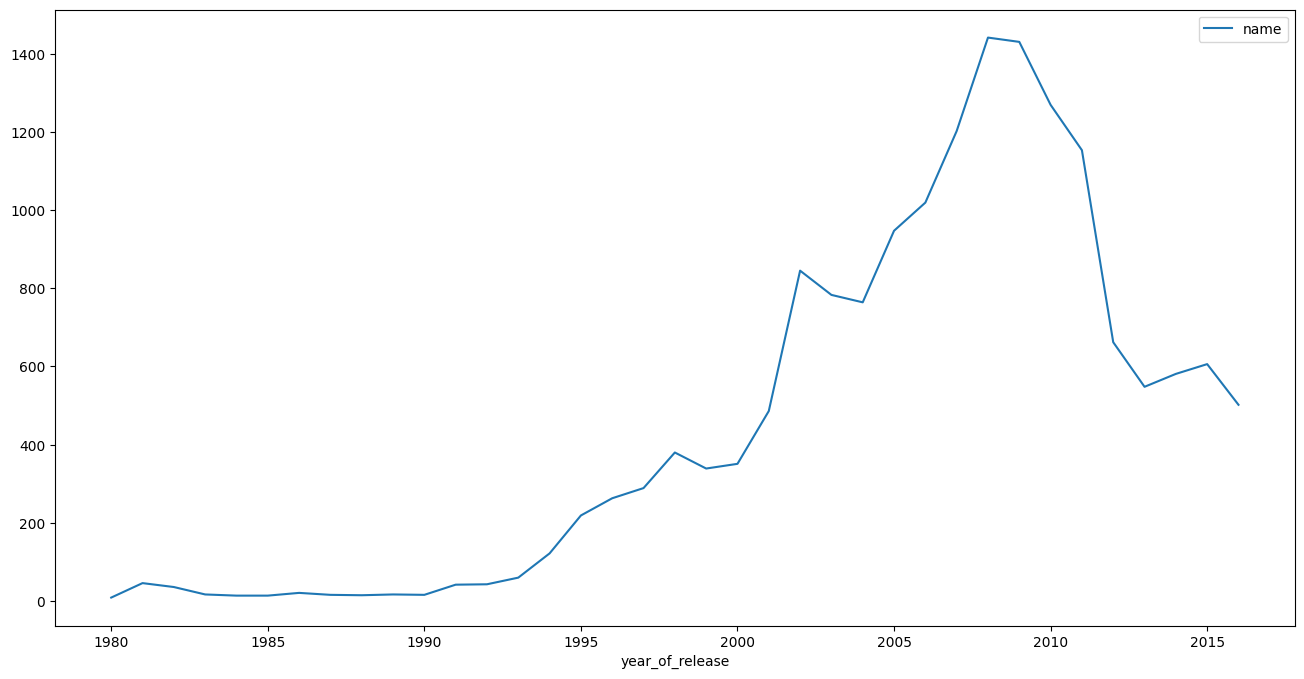

In [39]:
data_by_year.plot(figsize=(16, 8))

We can see that the number of games starts to increase in the early 90s. This is likely due to the development of computers and gaming consoles. We can even observe a sharp increase between 2001 and 2002, which may have been caused by the release of the Xbox in November 2001.
However, starting from 2008, we see a sharp decline. This could be related to the increasing popularity and accessibility of the internet (by 2010, 30% of the world's population was already using it), and online piracy was not yet regulated.
We can disregard data before 1995 as there were few games released then.

Now let's examine how sales have changed by platform.

<Axes: xlabel='platform'>

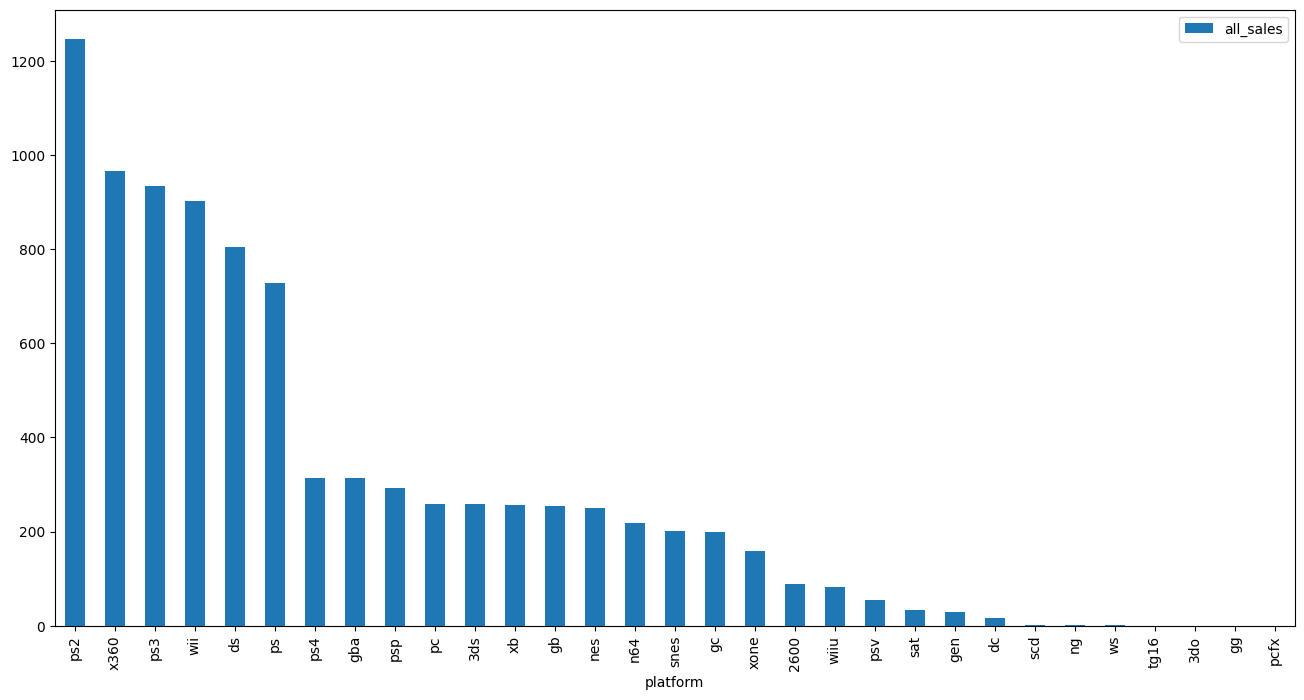

In [40]:
(
    data.groupby('platform')
        .agg({'all_sales': 'sum'})
        .sort_values(by='all_sales', ascending=False)
        .plot(kind='bar', figsize=(16, 8))
)

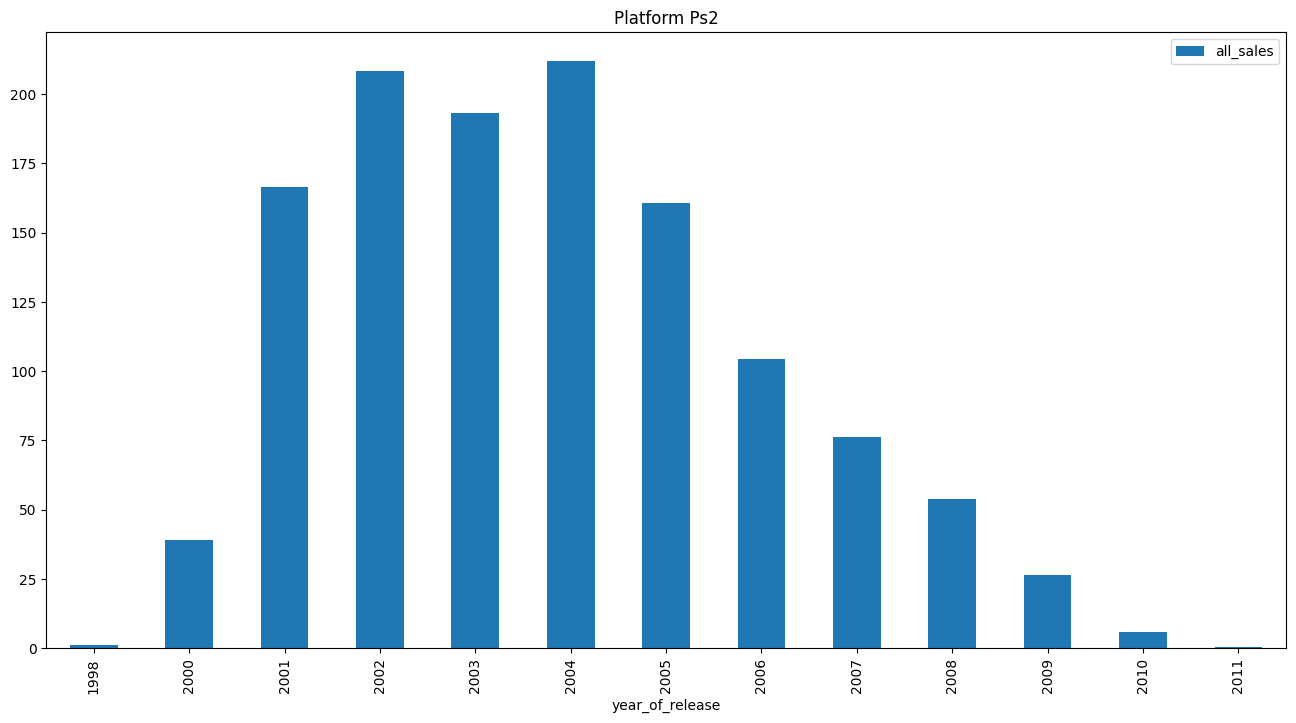

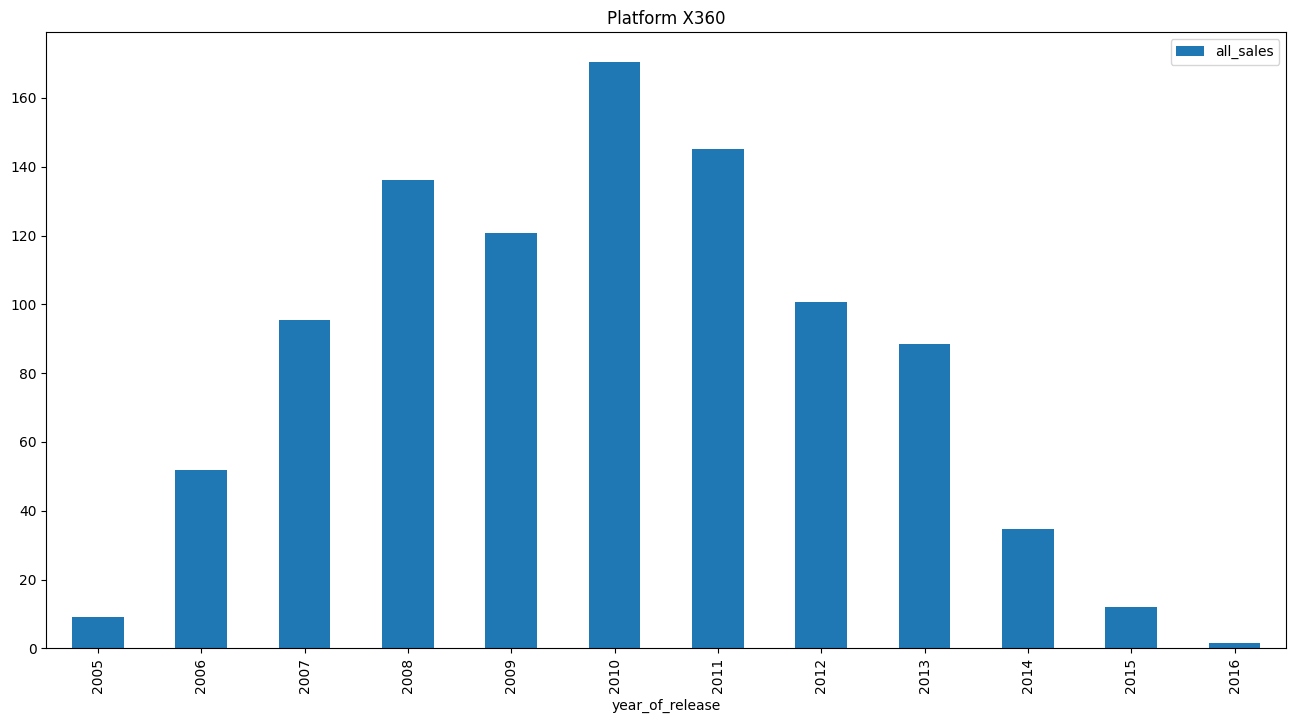

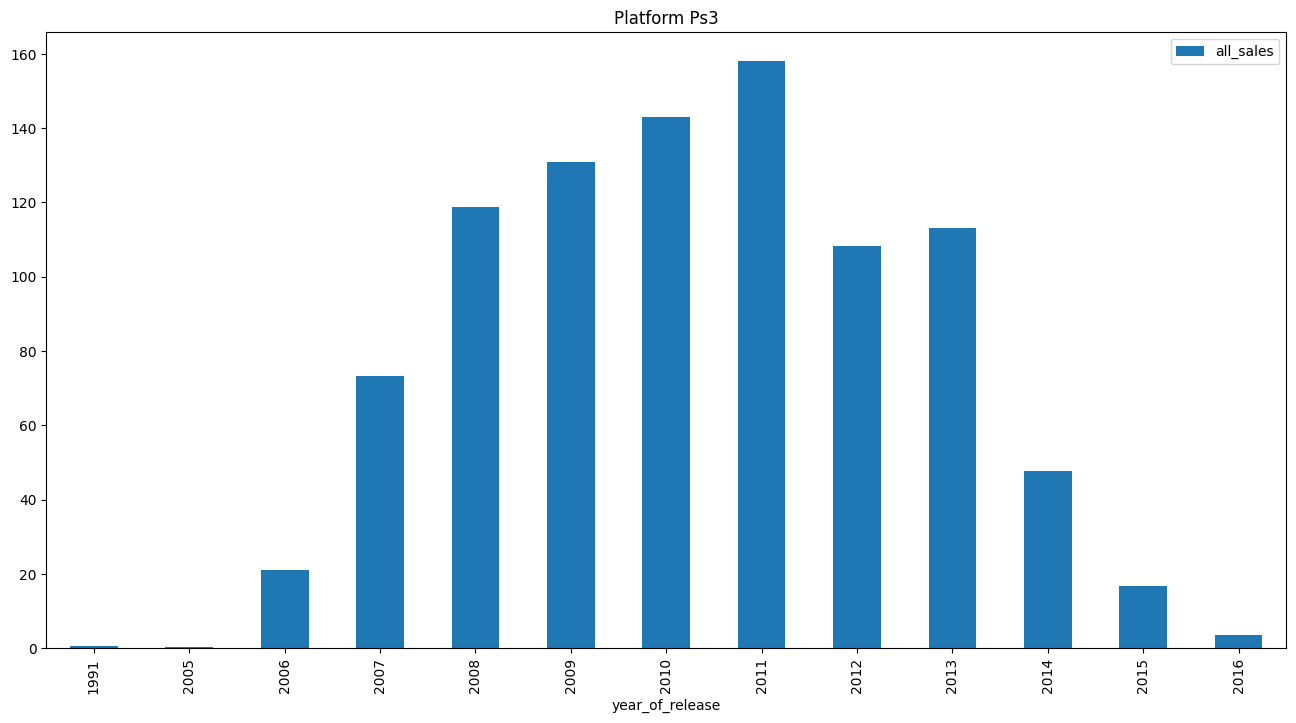

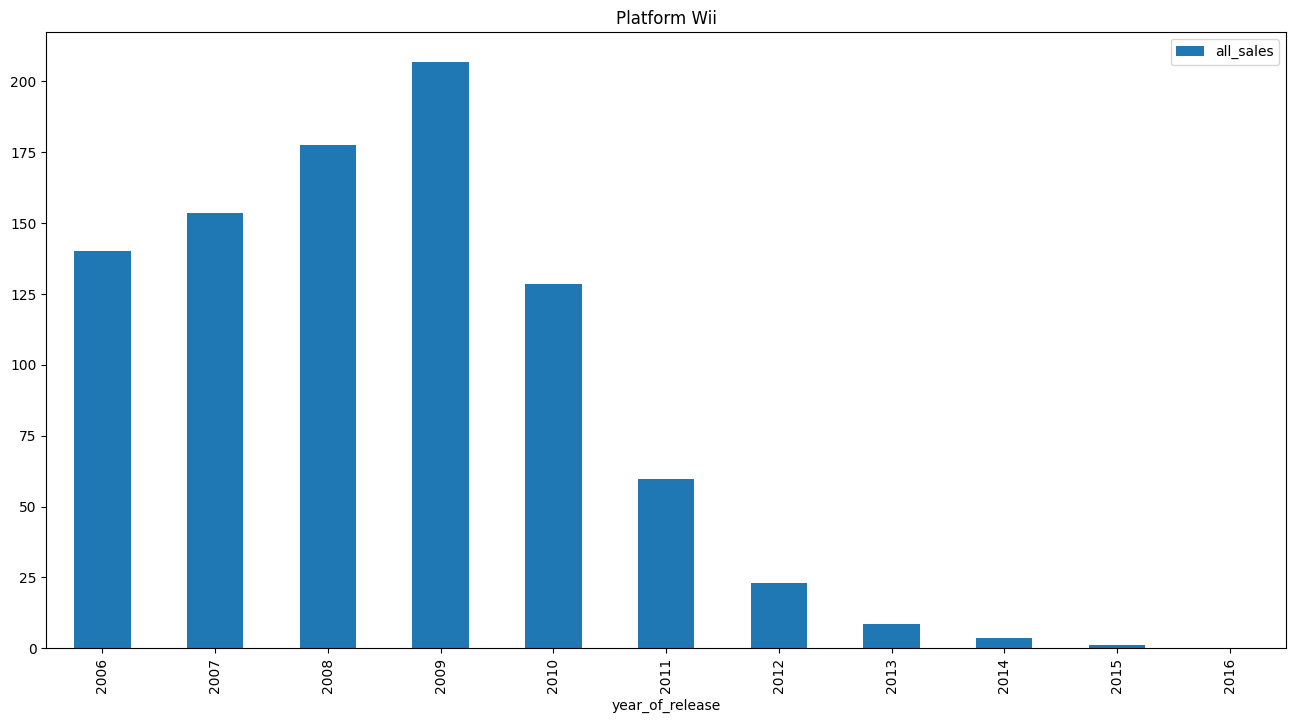

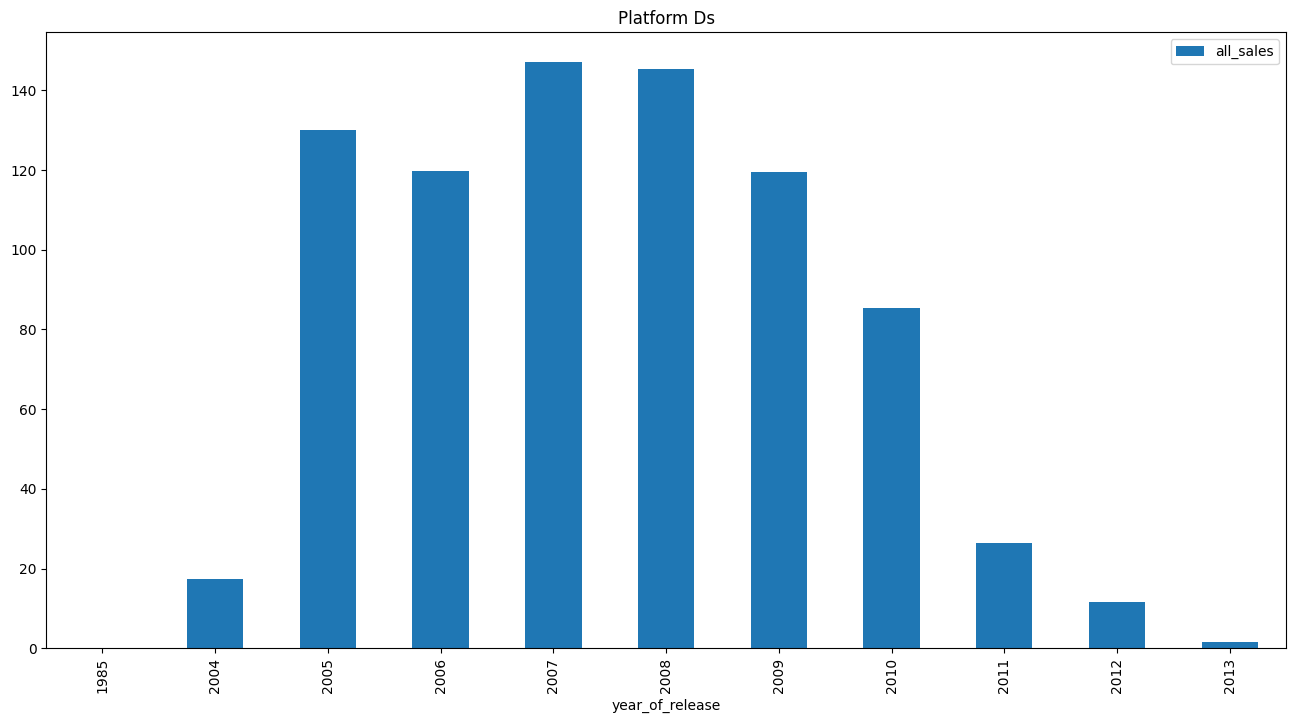

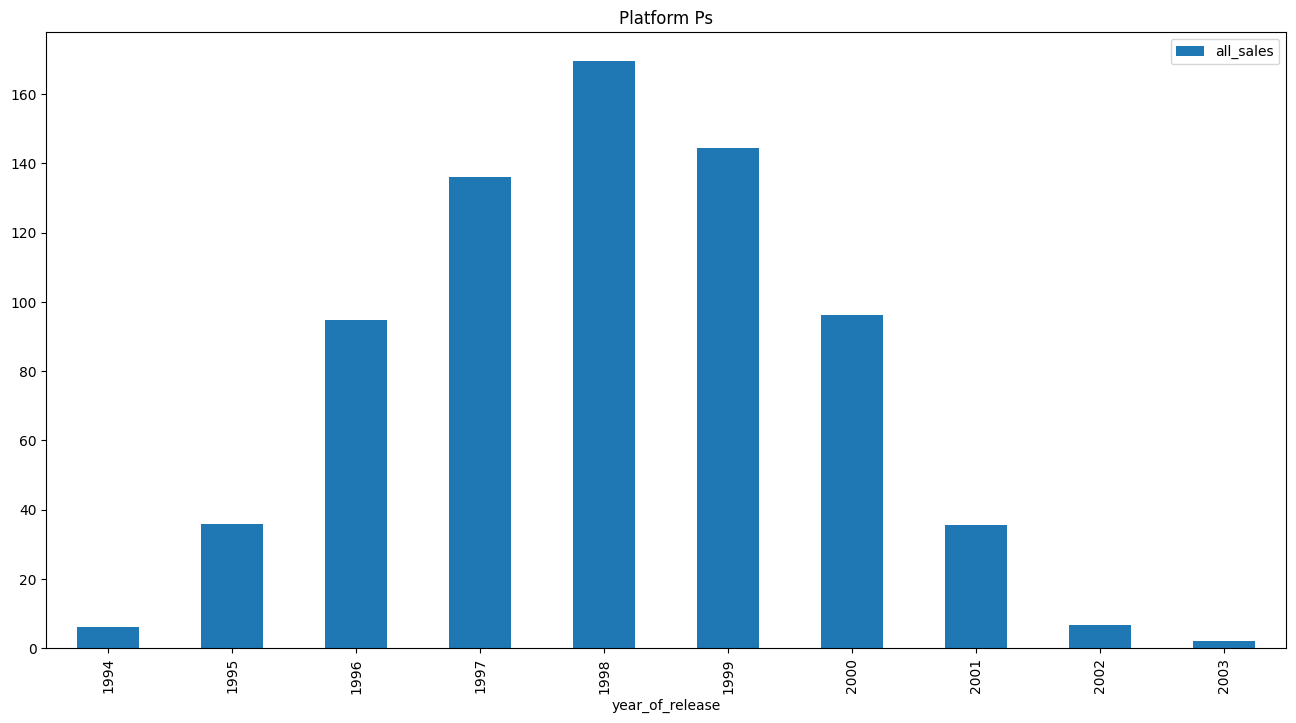

In [41]:
biggest_platforms = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

for platform in biggest_platforms:
    data[data['platform'] == platform].groupby('year_of_release').agg({'all_sales': 'sum'}).plot(kind='bar', figsize=(16, 8), title=f'Platform {platform.capitalize()}')

Let's define the threshold for a platform's presence on the market by sales volume of 40 million. Then, PS2 was on the market for 8 years, X360 for 8 years, PS3 for 8 years, Wii for 6 years, DS for 6 years, and PS for 5 years. On average, a platform exists on the market for about 7 years.

We can observe that each platform reaches its peak popularity smoothly around 3-4 years after entering the market. Similarly, sales gradually decline after reaching the peak. This can be attributed to the release of newer and more advanced platforms, as well as the gradual decline of the gaming market.

Since the goal of our project is to forecast sales for 2017, it's important to focus only on the relevant period. As we've determined, a platform typically lasts around 7 years, so we'll take data from 2009 to 2016.

In [42]:
data = data[data['year_of_release'] >= 2009]
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,84.0,E,28.32
14,kinect adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,61.0,63.0,E,21.82
15,wii fit plus,wii,2009,sports,9.01,8.49,2.53,1.77,80.0,74.0,E,21.80
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05


By trimming the data to the relevant period only, we can once again examine which platforms are leading in terms of sales.

<Axes: xlabel='platform'>

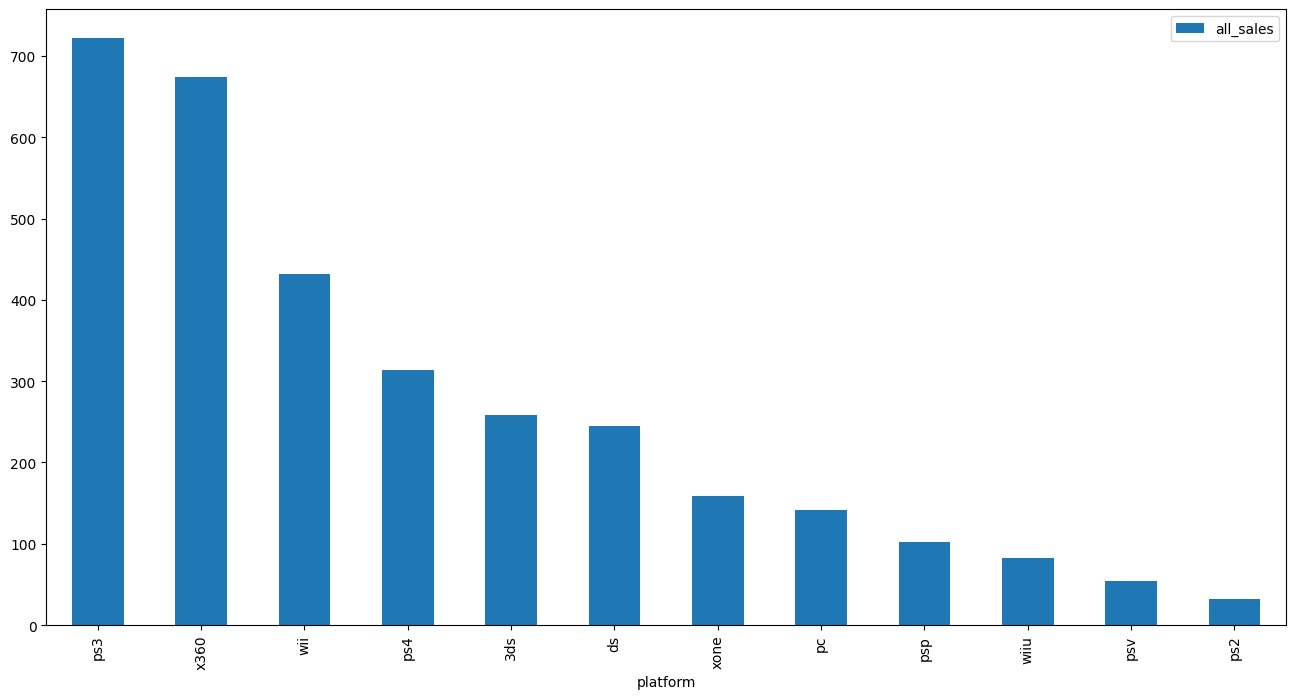

In [43]:
(
    data.groupby('platform')
        .agg({'all_sales': 'sum'})
        .sort_values(by='all_sales', ascending=False)
        .plot(kind='bar', figsize=(16, 8))
)

On the market, platforms like *PS3*, *X360*, *Wii*, *DS* are still leading. But let's see which platforms are growing and which are declining.

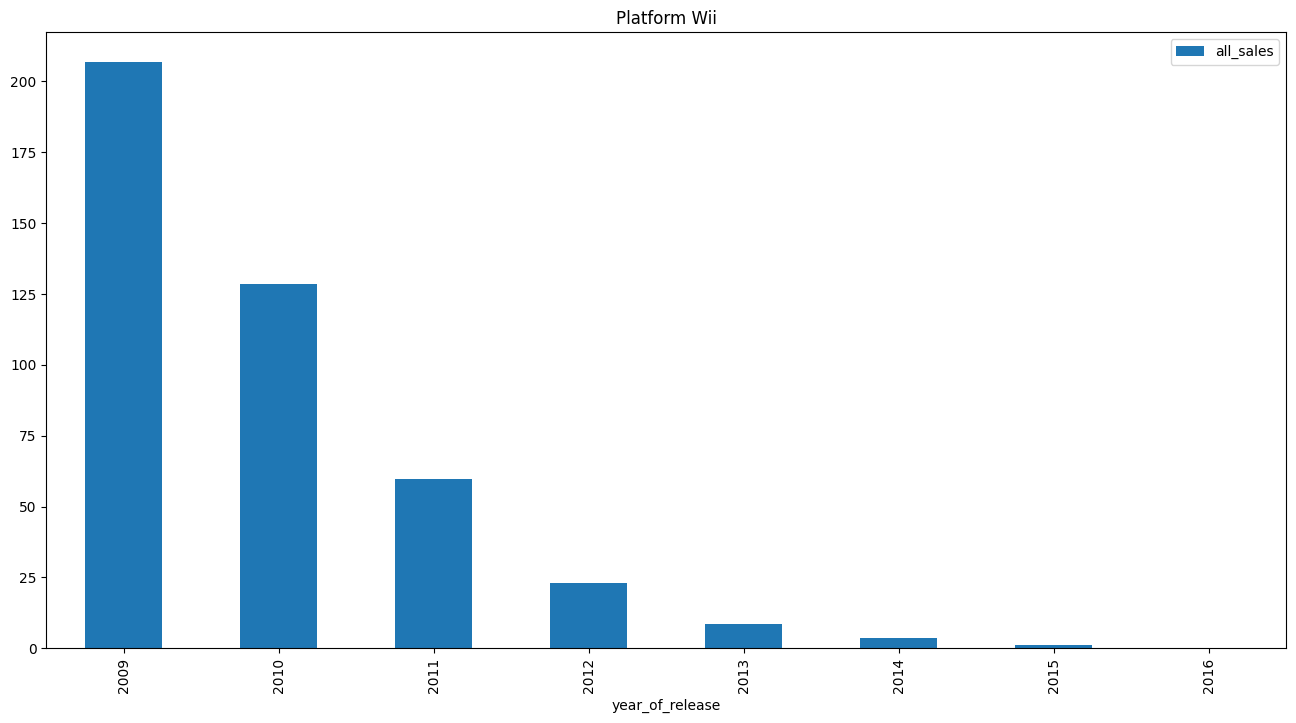

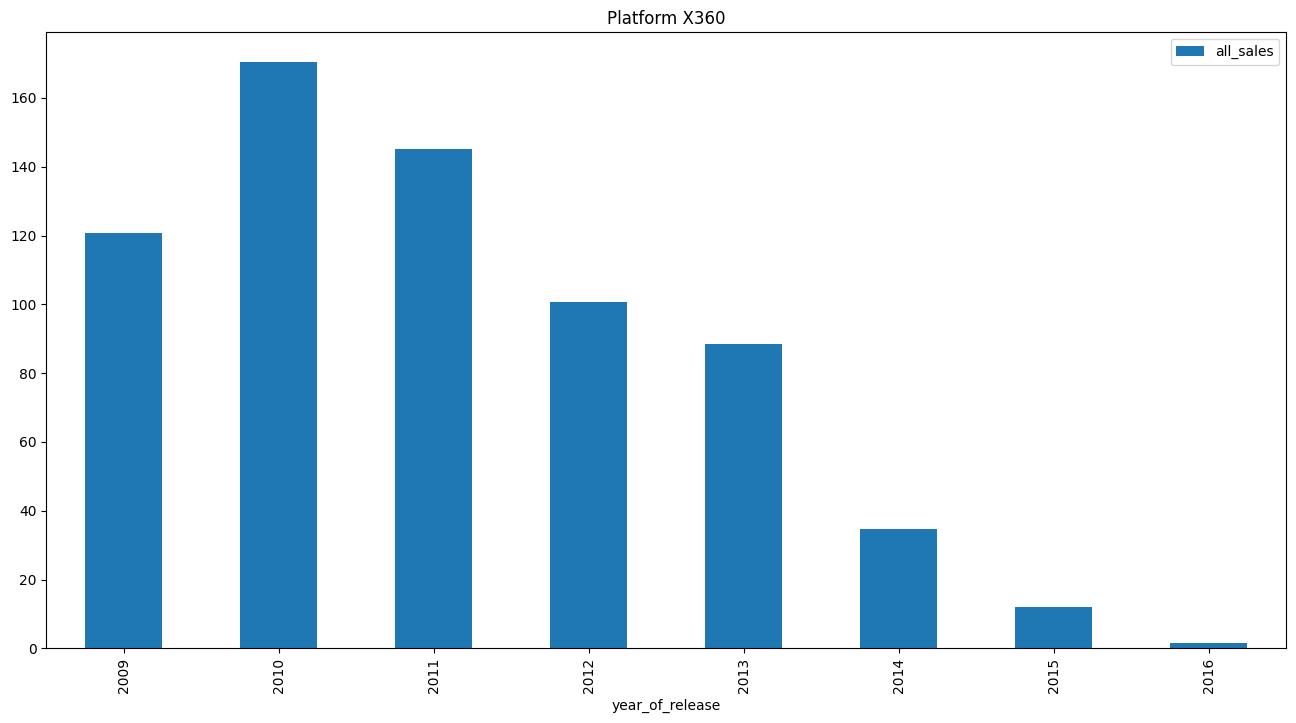

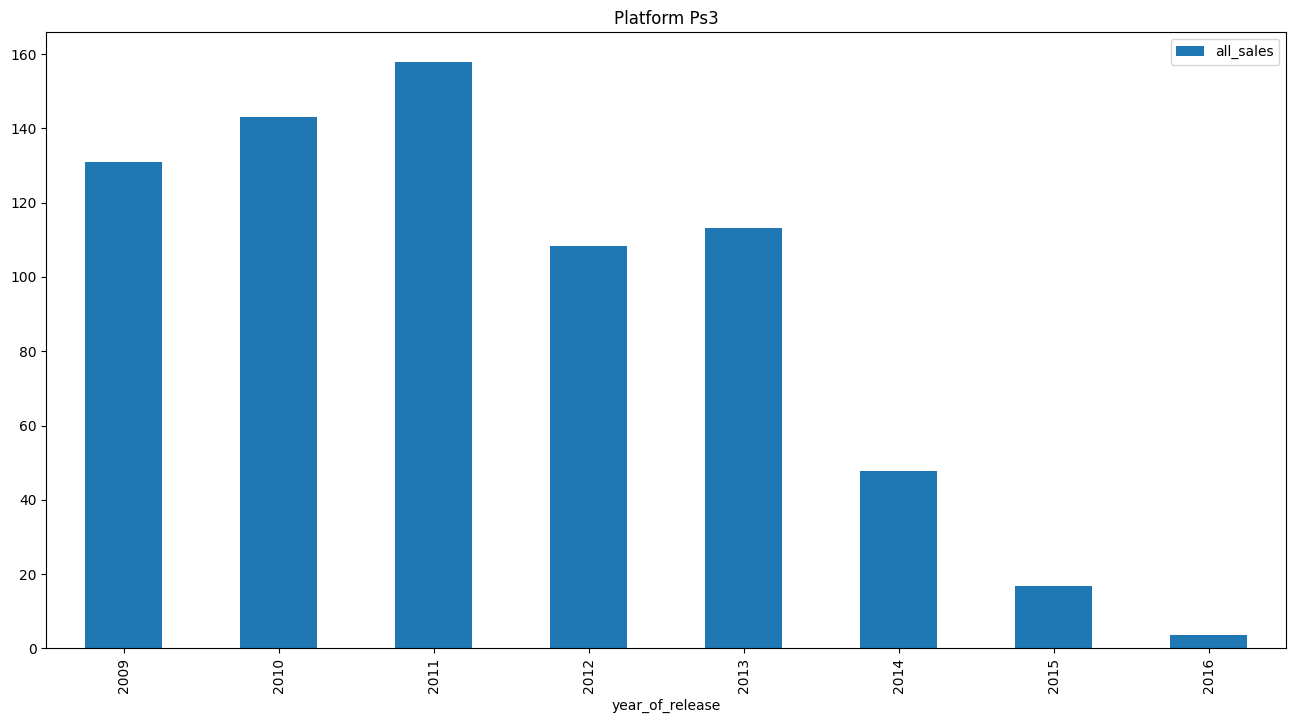

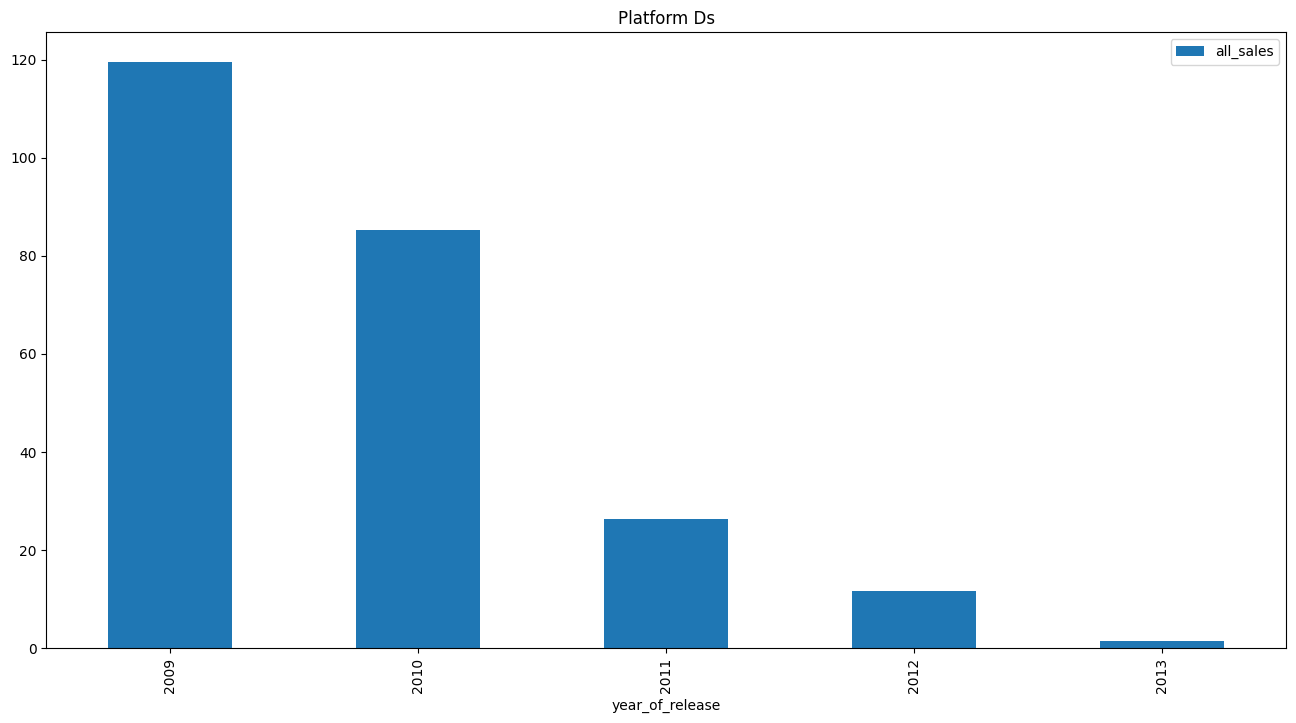

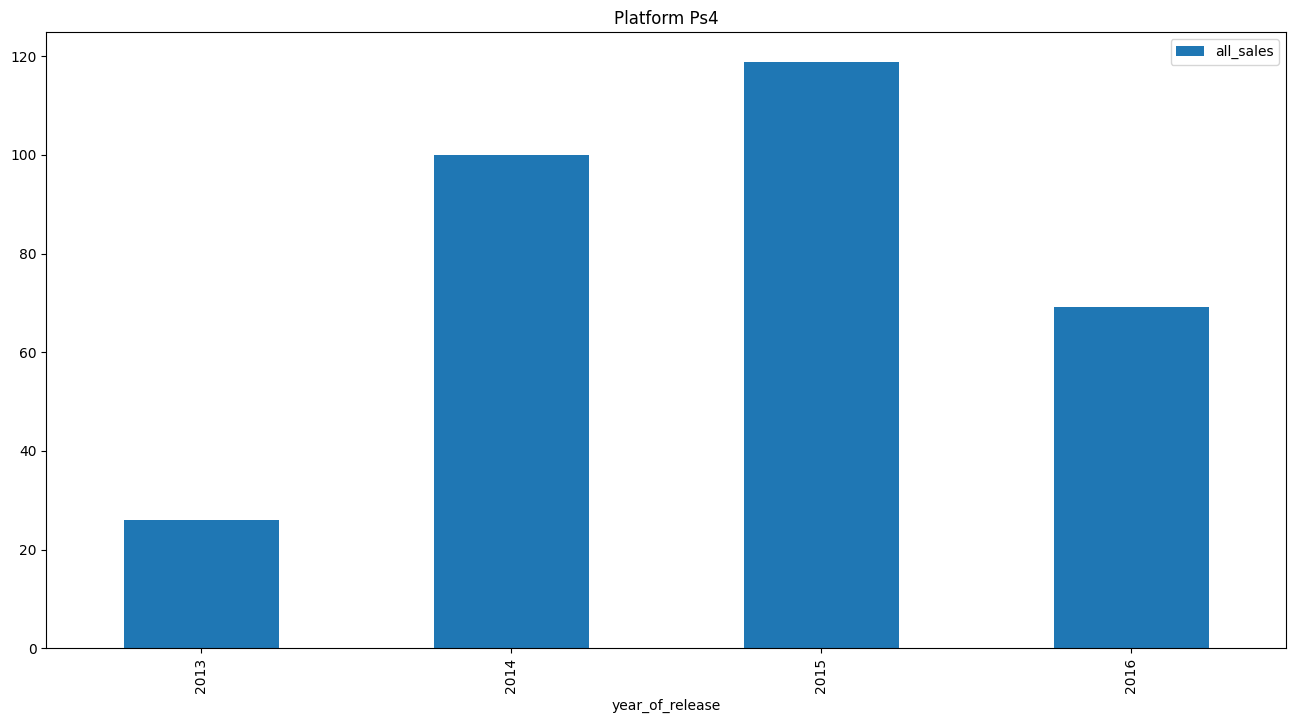

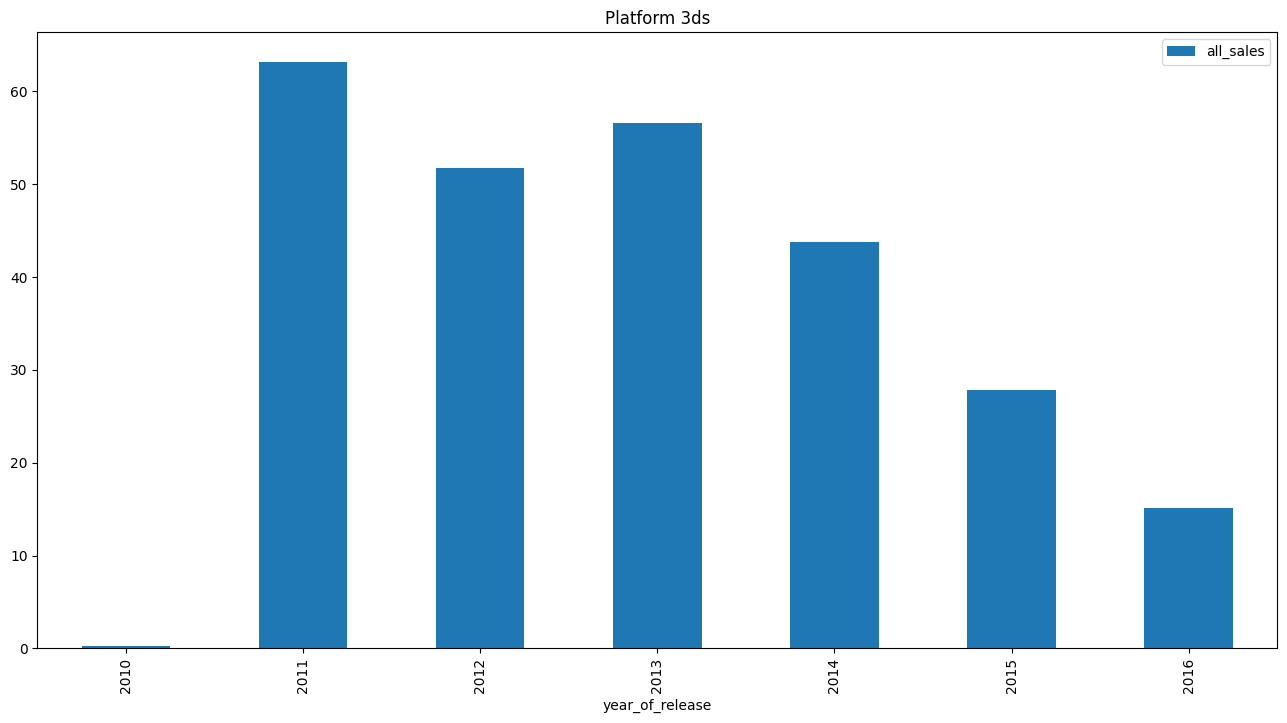

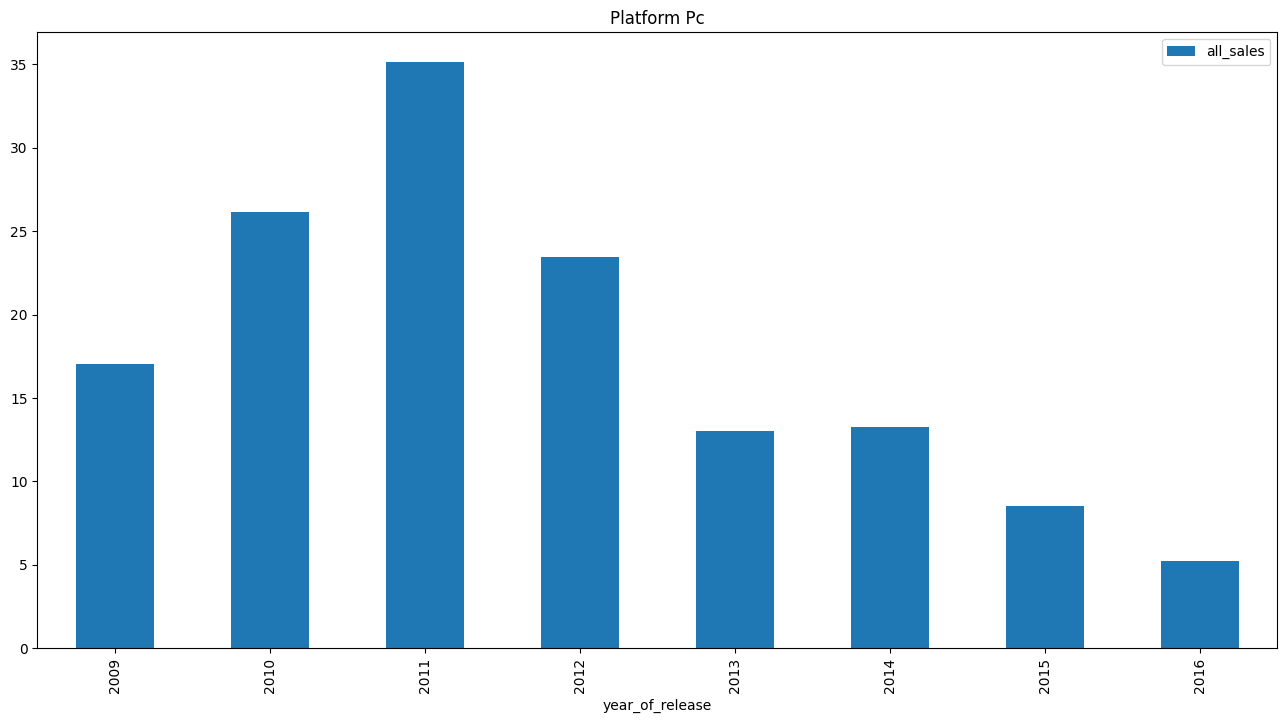

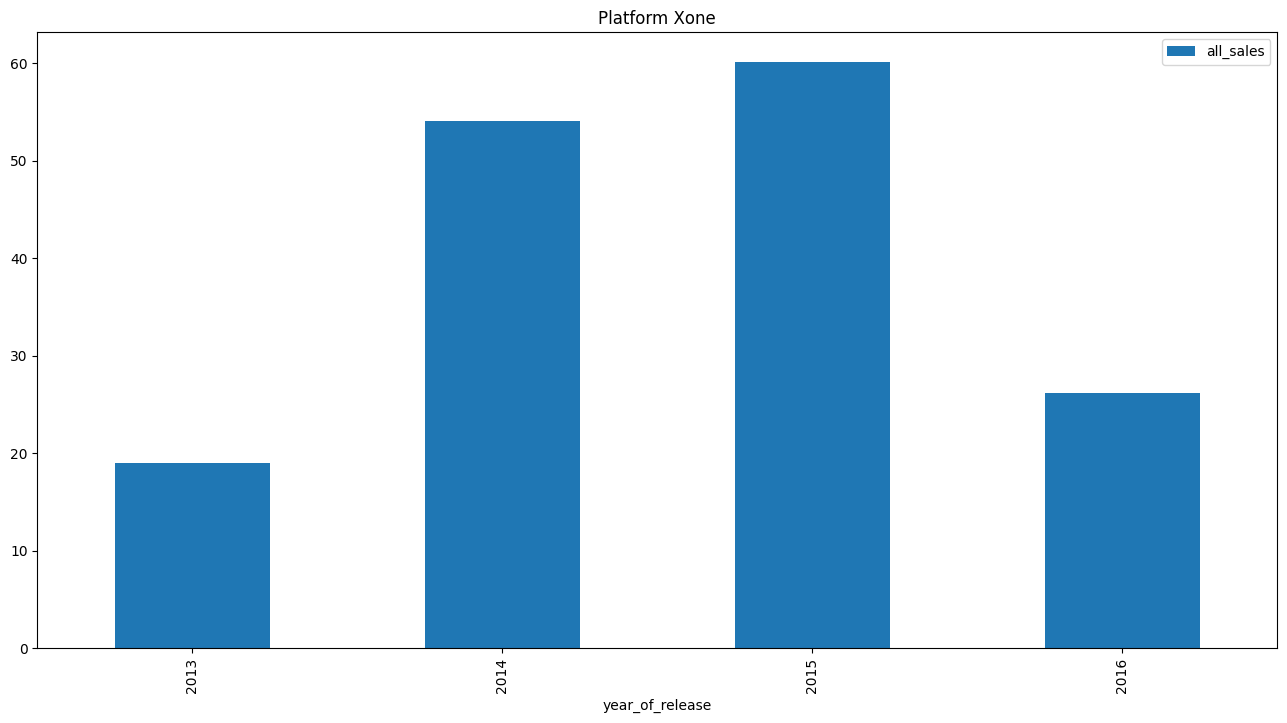

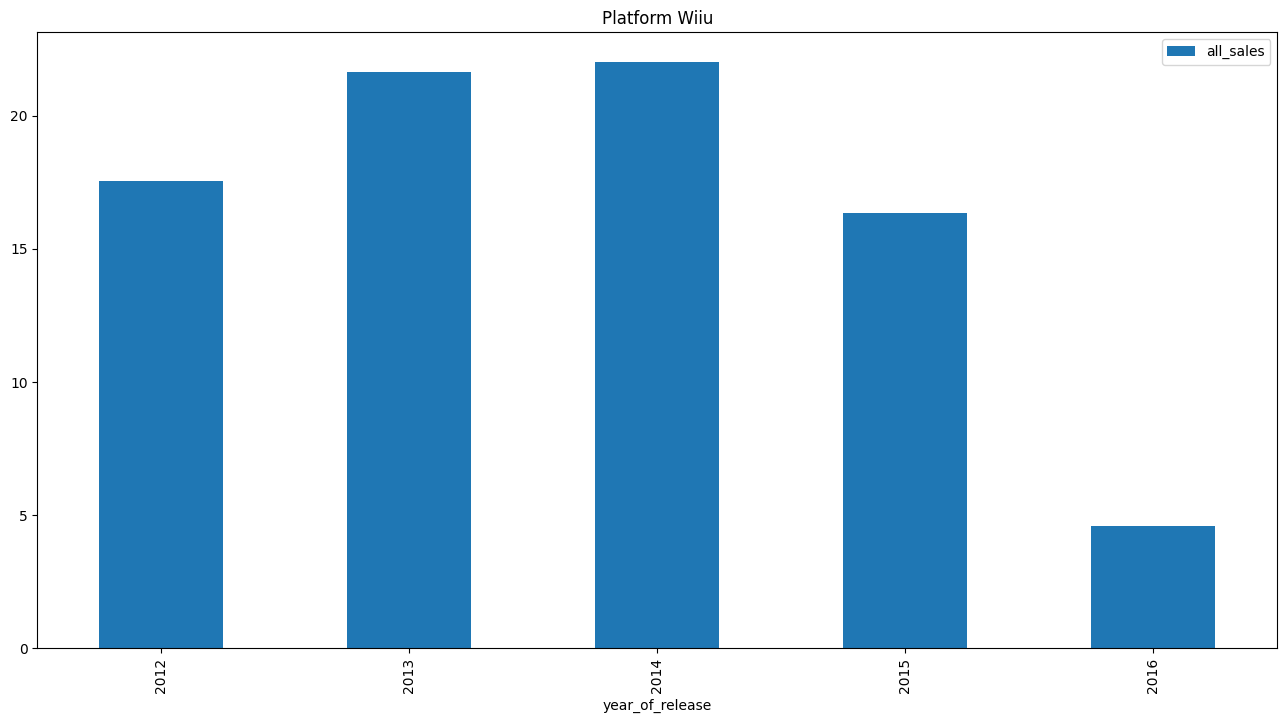

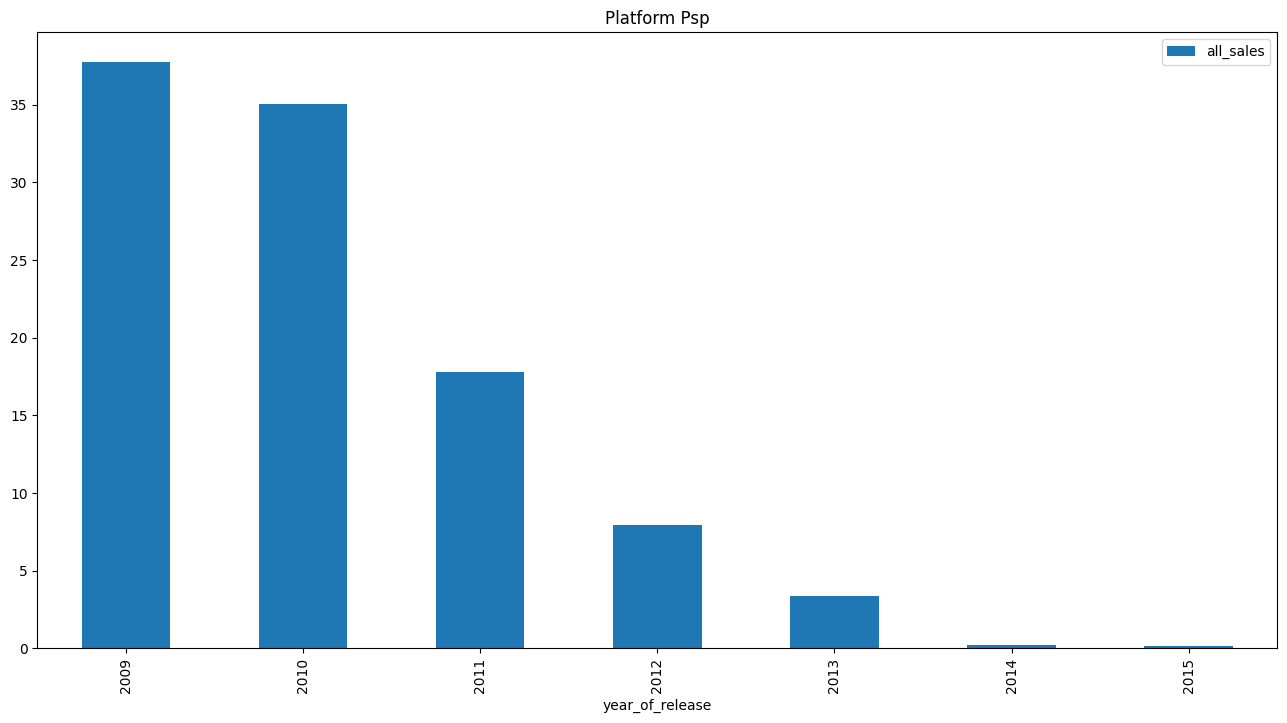

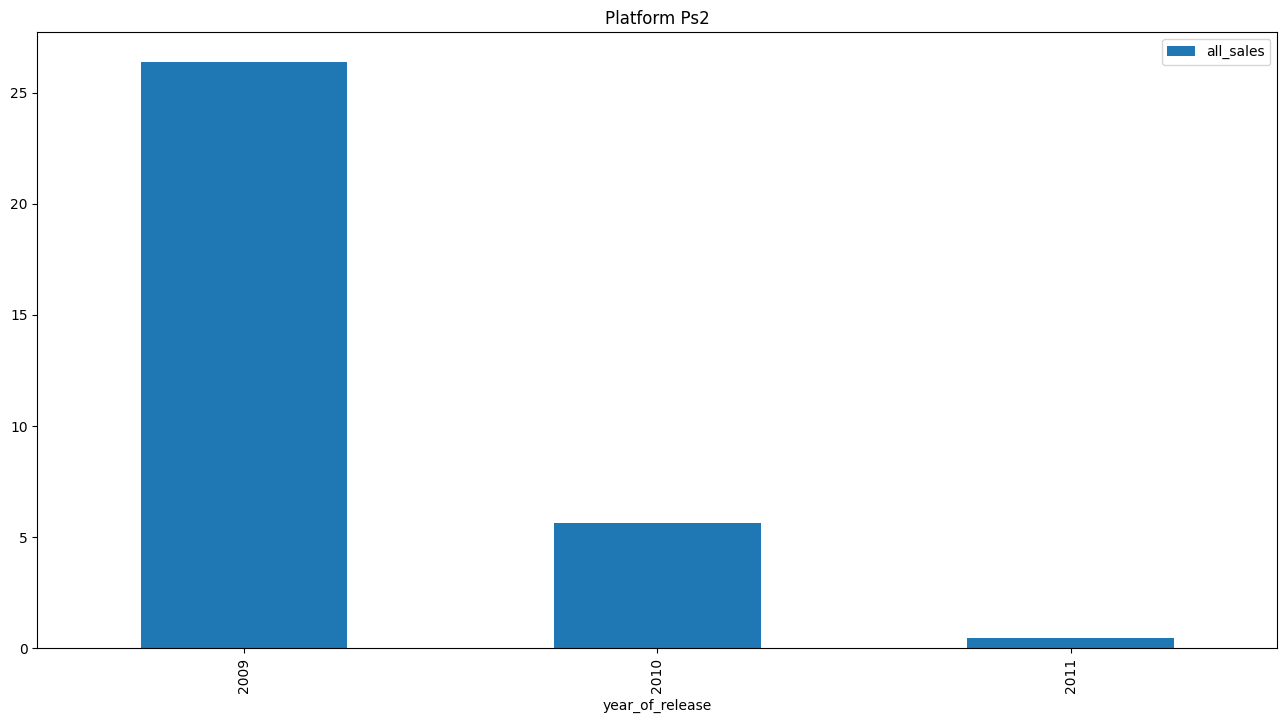

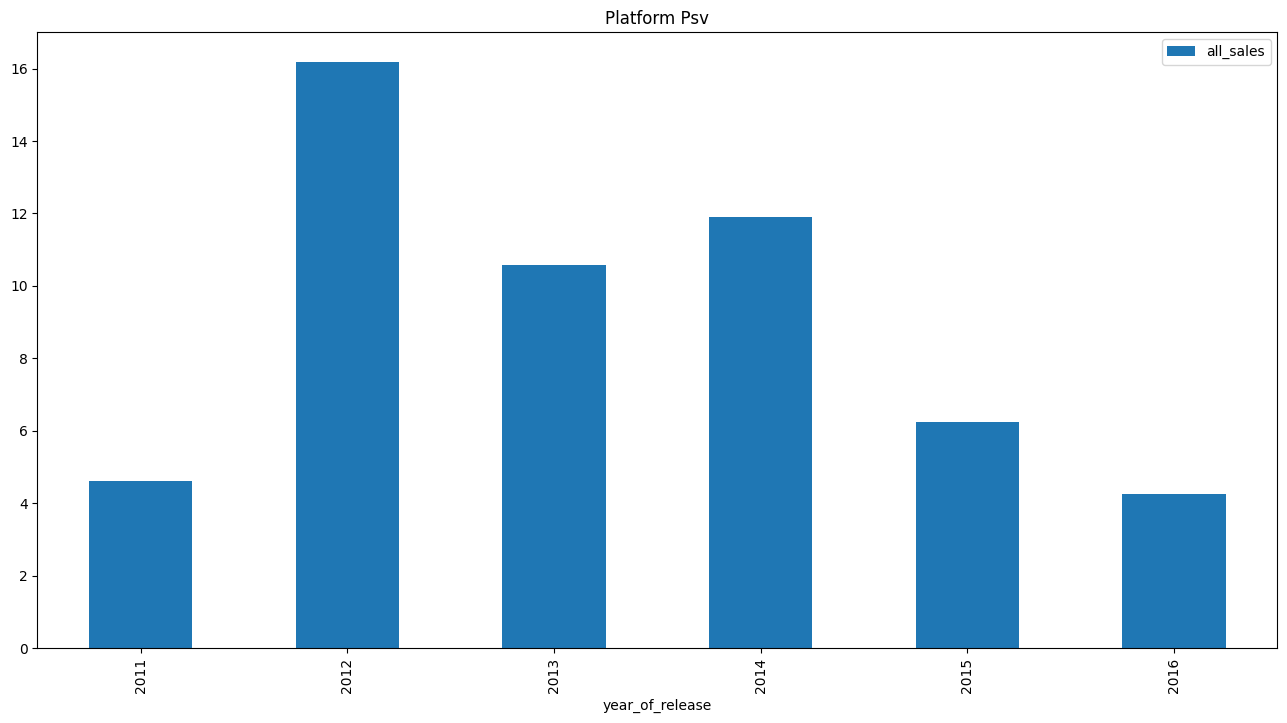

In [44]:
for platform in data['platform'].unique():
    data[data['platform'] == platform].groupby('year_of_release').agg({'all_sales': 'sum'}).plot(kind='bar', figsize=(16, 8), title=f'Platform {platform.capitalize()}')

(0.0, 2.0)

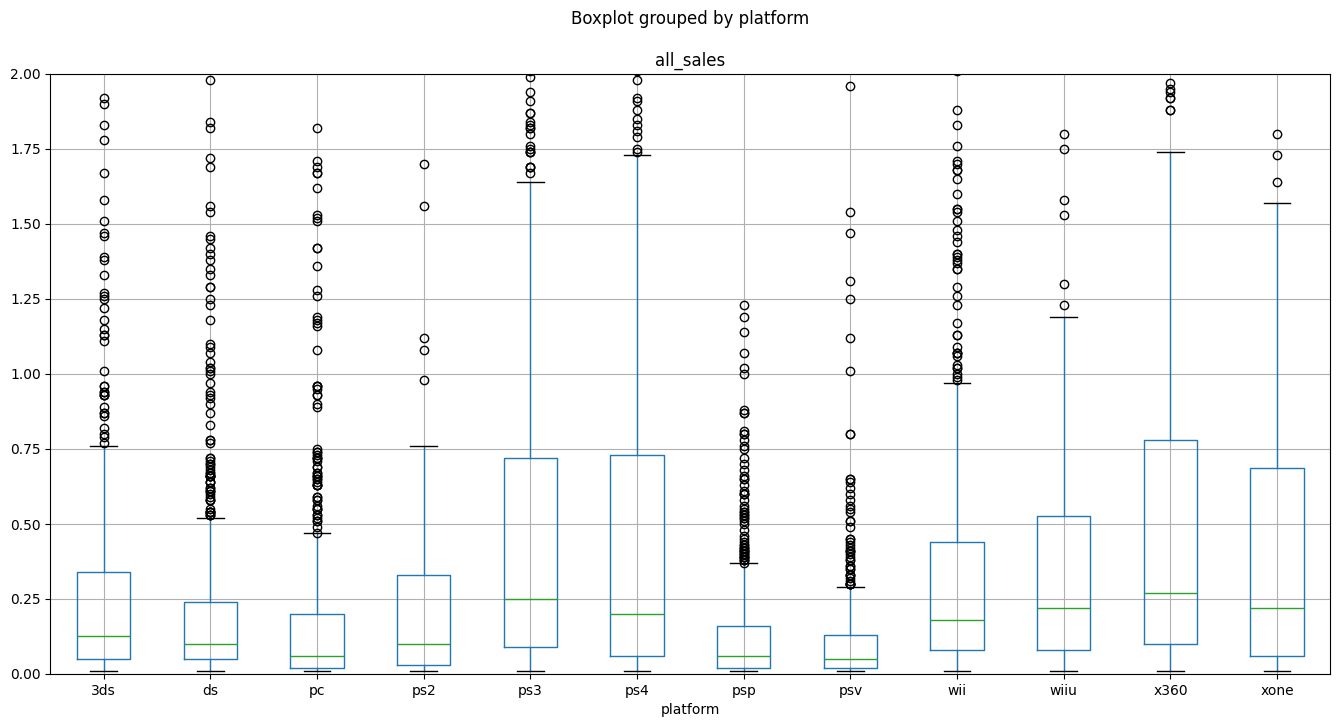

In [45]:
import matplotlib.pyplot as plt

data.boxplot(by='platform', column='all_sales', figsize=(16, 8))
plt.ylim(0, 2)

From the box plot, we can observe that:
- for most platforms, 50% of games have poor sales (`3DS`, `DS`, `PC`, `PS2`, `PSP`, `PSV`)
- there are giants in the market, such as `PS3`, `PS4`, `X360`, and `XOne`, with games selling well on average, although 50% of games have sales below a quarter of a million
- all platforms have outliers - games that have high sales, but they are unique in their kind

To build a forecast close to reality for 2017, we should remove the outliers:

Although platforms like *Wii*, *X360*, *PS3*, *DS* are the sales leaders for the 2009-2016 period, the diagram shows that they have already ceased to exist or are becoming unprofitable.

We can consider *PS4*, *PC*, *Wii U*, *XOne* as potentially profitable. Even though these companies showed a decline in sales for 2016, we remember that we have incomplete data for that year in our table.

In [46]:
def get_whiskers(dataset):
    q_1 = dataset.quantile(0.25)
    q_3 = dataset.quantile(0.75)
    iqr = q_3 - q_1
    left_whisker = q_1 - 1.5 * iqr
    right_whisker = q_3 + 1.5 * iqr
    return (
        max(dataset.min(), left_whisker),
        min(dataset.max(), right_whisker)
    )

for platform in data['platform'].unique():
    l_whisker, r_whisker = get_whiskers(data.loc[data['platform'] == platform, 'all_sales'])
    data = data[~(
            (data['platform'] == platform) &
            ((data['all_sales'] < l_whisker) | (data['all_sales'] > r_whisker)))]

Let's see how user and critic reviews affect sales within one popular platform. We'll create a scatter plot and calculate the correlation between reviews and sales.

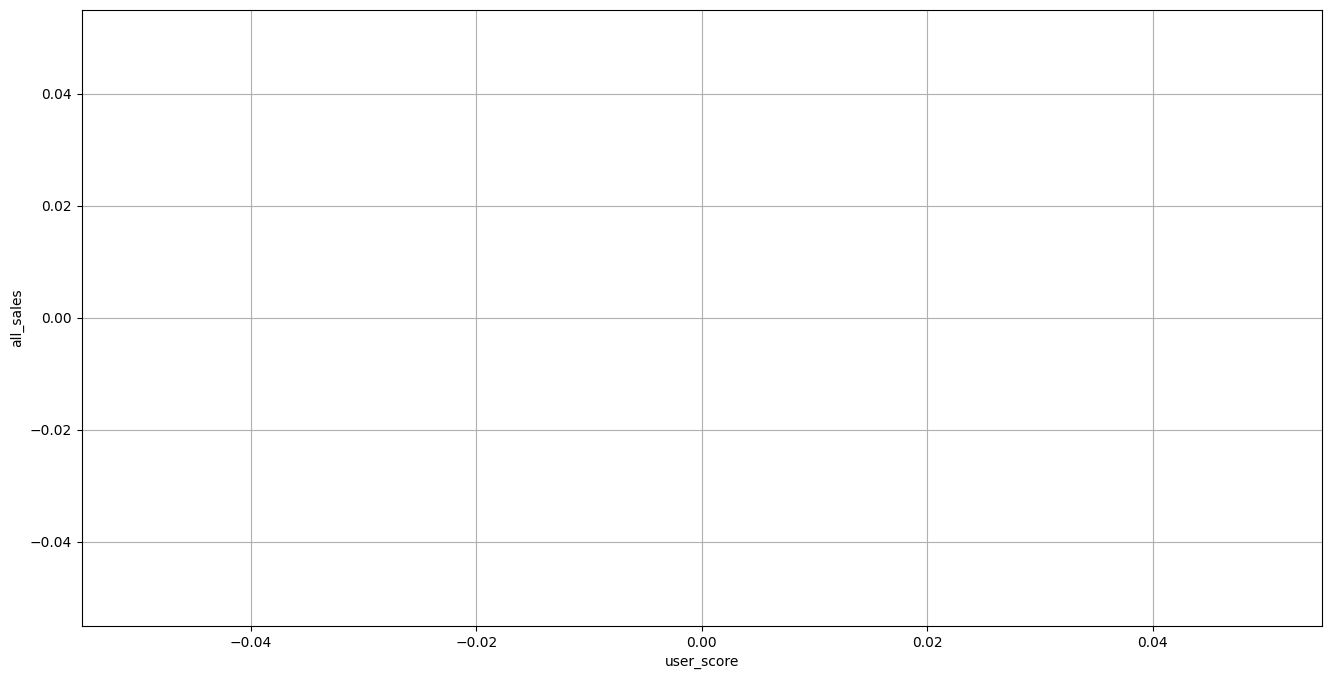

Correlation between all_sales and user_score for PS4 platform is very high: nan



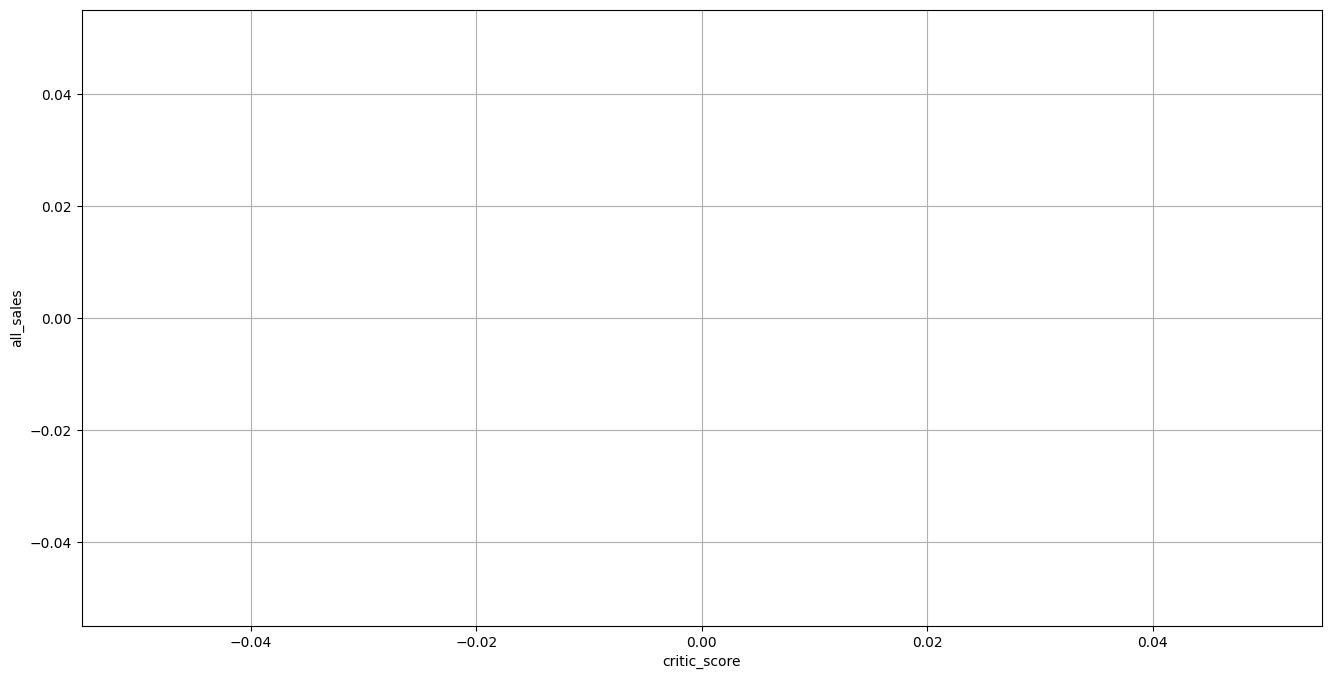

Correlation between all_sales and critic_score for PS4 platform is very high: nan



In [47]:
def corr_category(corr):
    abs_corr = abs(corr)
    if abs_corr < 0.2:
        return 'very weak'
    elif abs_corr < 0.5:
        return 'weak'
    elif abs_corr < 0.7:
        return 'moderate'
    elif abs_corr < 0.9:
        return 'high'
    return 'very high'

cols = ['user_score', 'critic_score']
ps4_data = data[data['platform'] == 'PS4']
for col in cols:
    ps4_data.plot(x=col, y='all_sales', kind='scatter', grid=True, figsize=(16,8))
    plt.show()
    corr = round((ps4_data['all_sales'].corr(ps4_data[col])), 2)
    print(f"Correlation between all_sales and {col} for PS4 platform is {corr_category(corr)}: {corr}")
    print('\n')

The correlation between reviews and sales is practically nonexistent.
Let's look at the correlation between `user_score` and `all_sales`, as well as between `critic_score` and `all_sales` on other platforms.

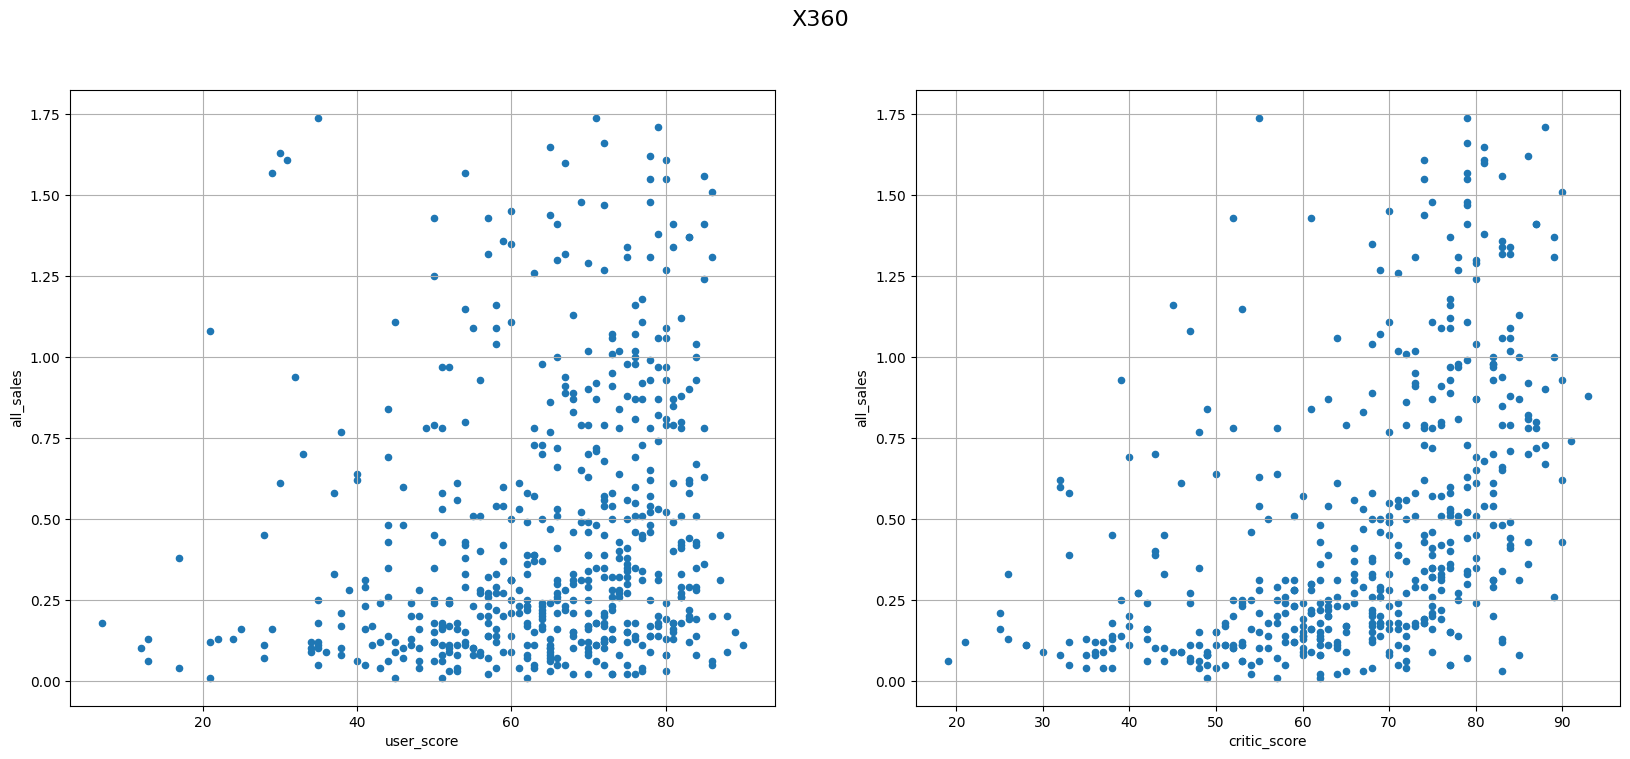

Correlation between critic reviews and sales for platform X360 is weak: 0.48
Correlation between user reviews and sales for platform X360 is weak: 0.2


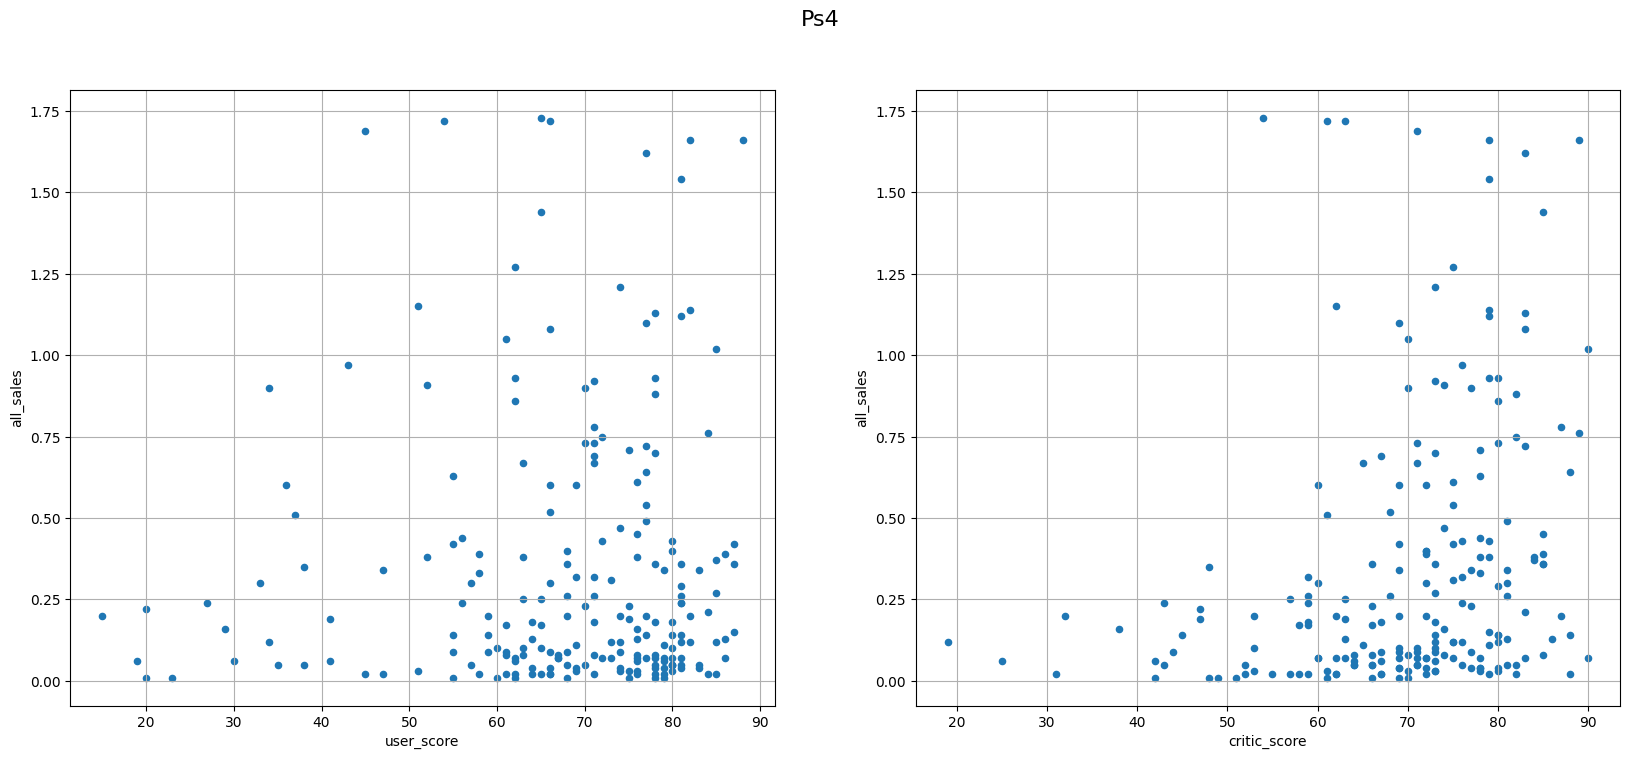

Correlation between critic reviews and sales for platform Ps4 is weak: 0.26
Correlation between user reviews and sales for platform Ps4 is very weak: 0.03


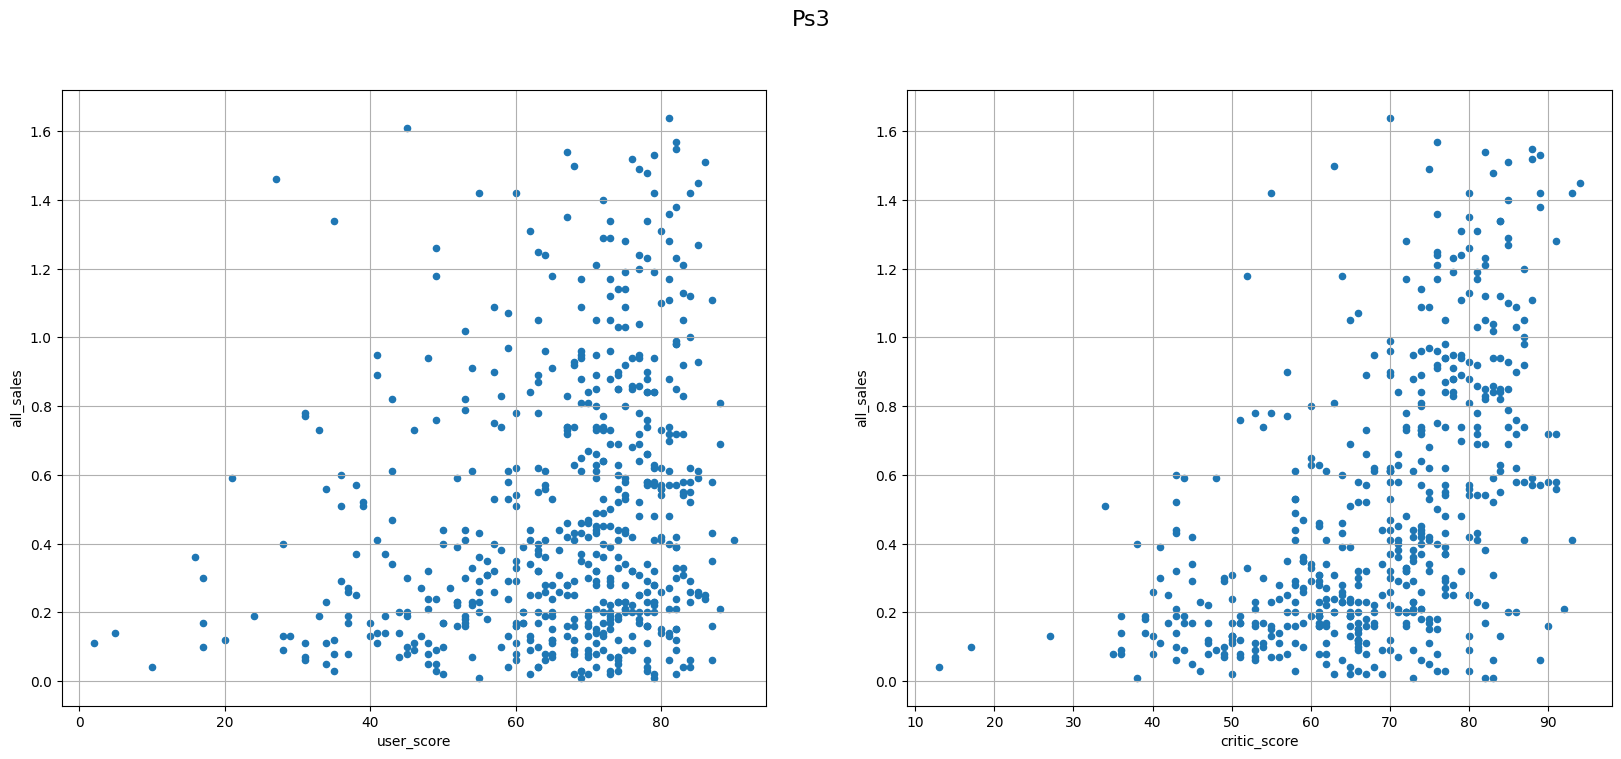

Correlation between critic reviews and sales for platform Ps3 is moderate: 0.52
Correlation between user reviews and sales for platform Ps3 is weak: 0.23


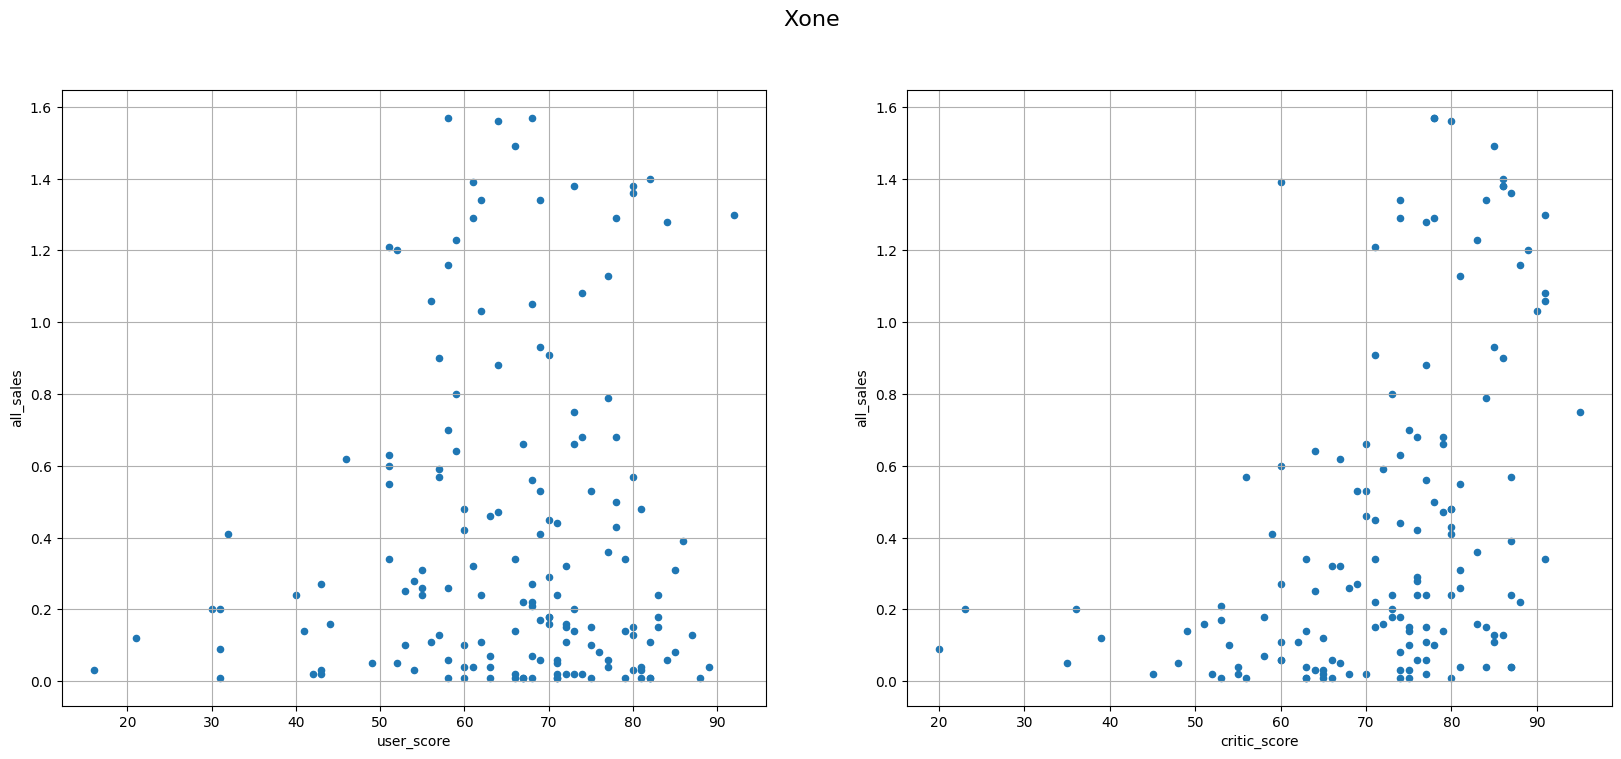

Correlation between critic reviews and sales for platform Xone is weak: 0.42
Correlation between user reviews and sales for platform Xone is very weak: 0.06


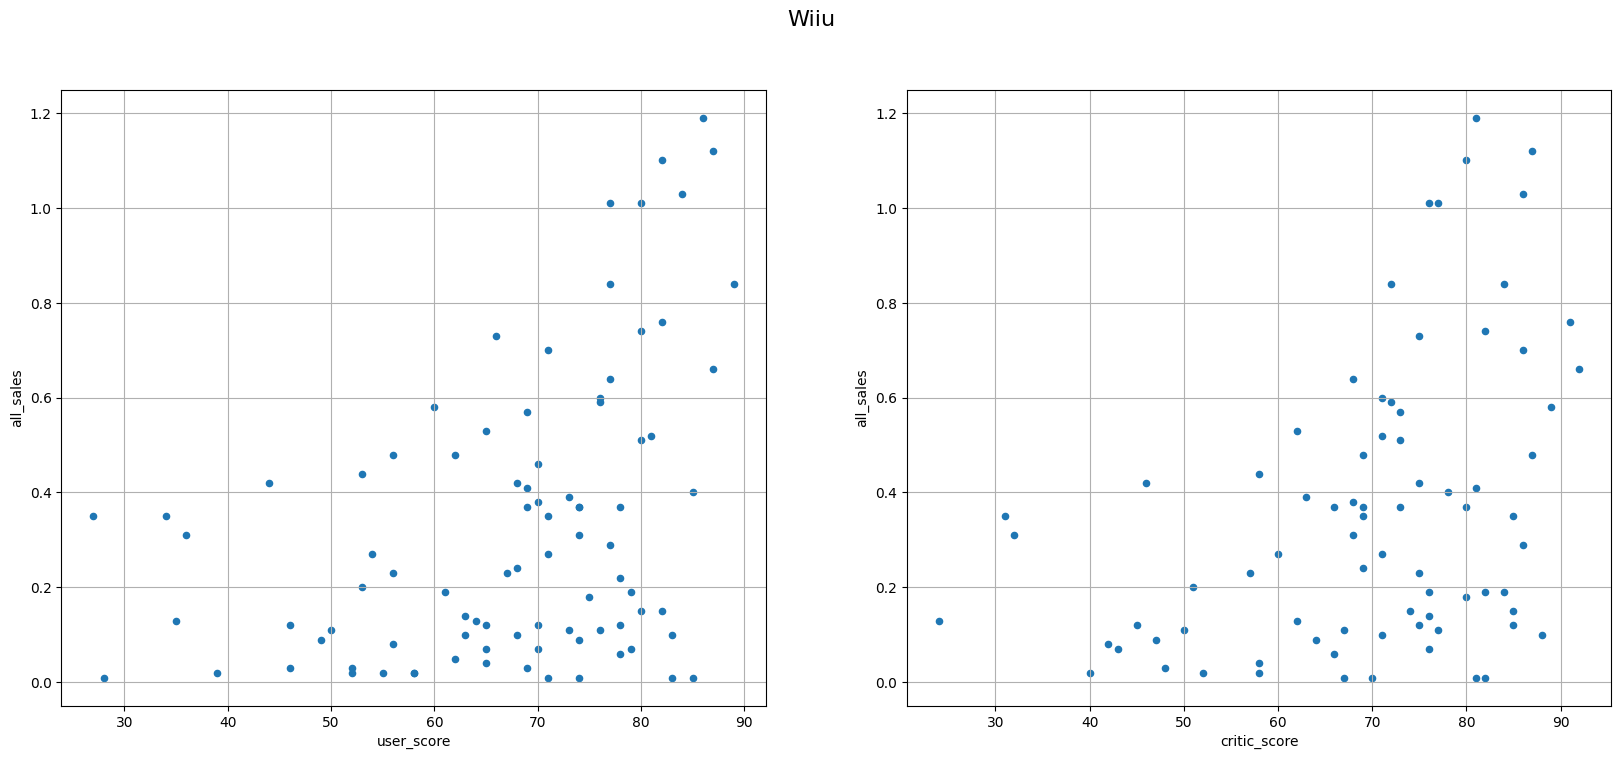

Correlation between critic reviews and sales for platform Wiiu is weak: 0.4
Correlation between user reviews and sales for platform Wiiu is weak: 0.4


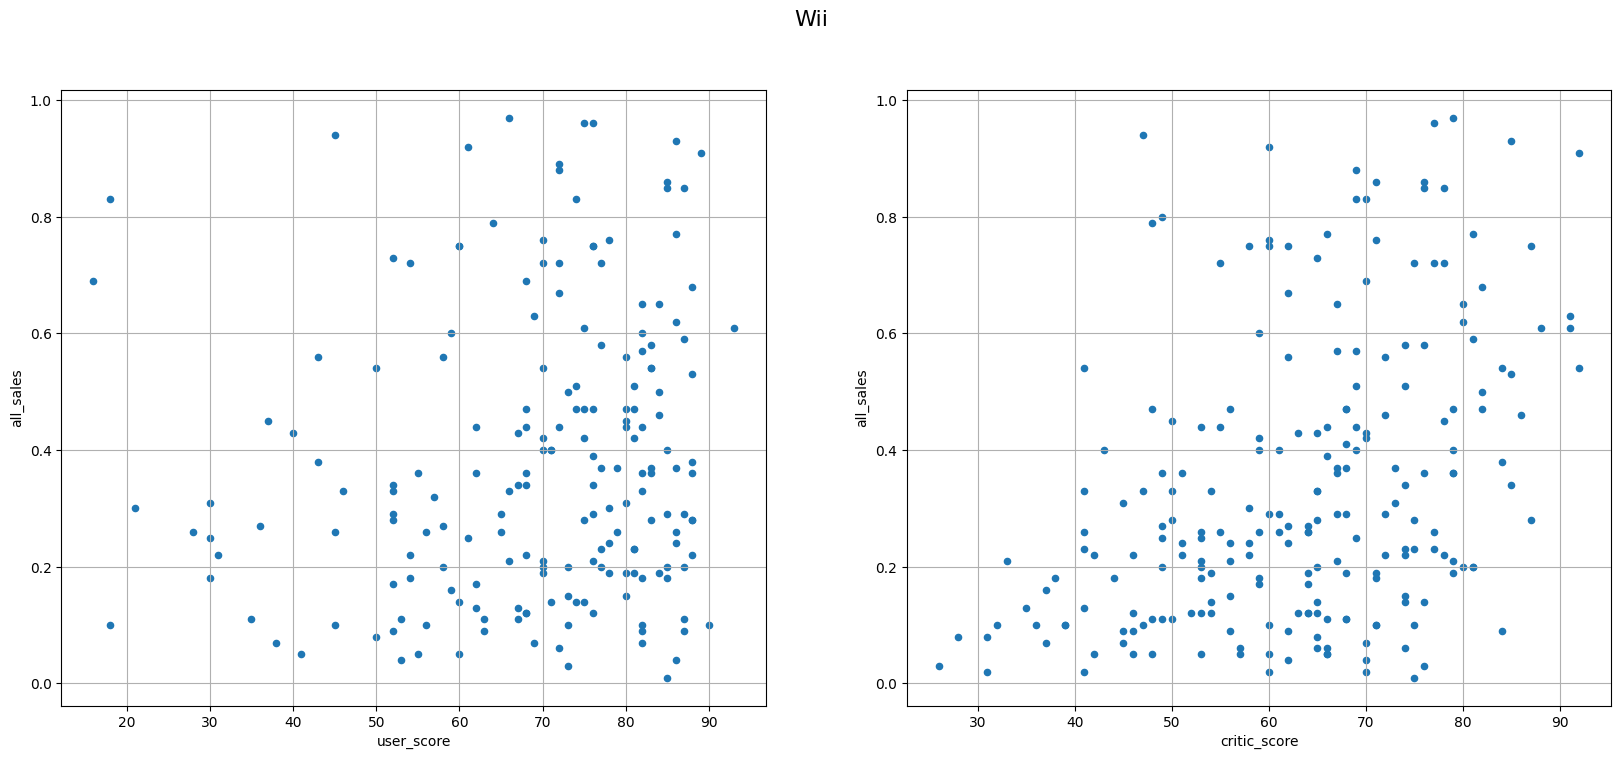

Correlation between critic reviews and sales for platform Wii is weak: 0.39
Correlation between user reviews and sales for platform Wii is very weak: 0.12


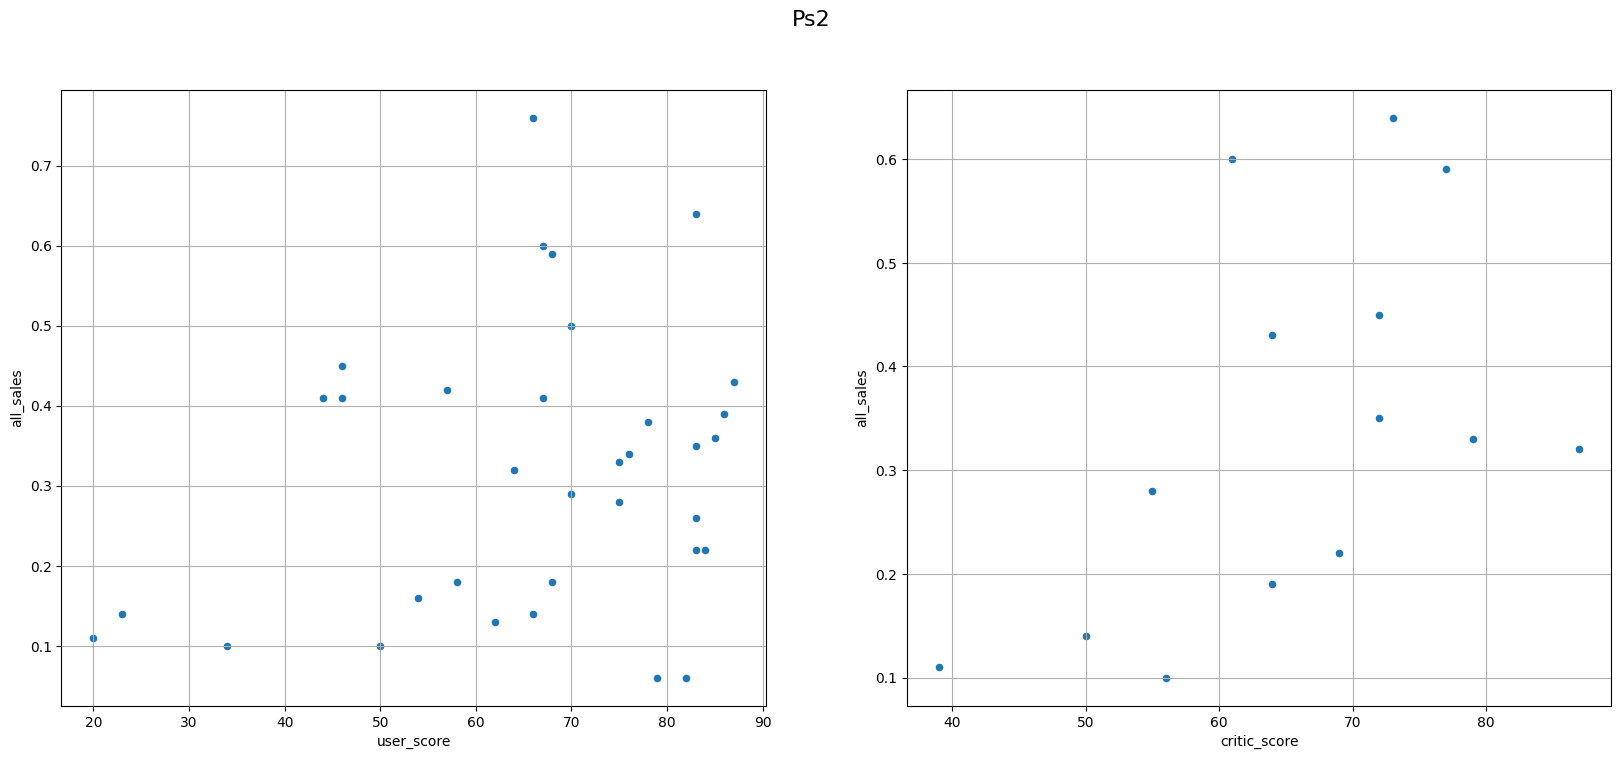

Correlation between critic reviews and sales for platform Ps2 is moderate: 0.53
Correlation between user reviews and sales for platform Ps2 is weak: 0.24


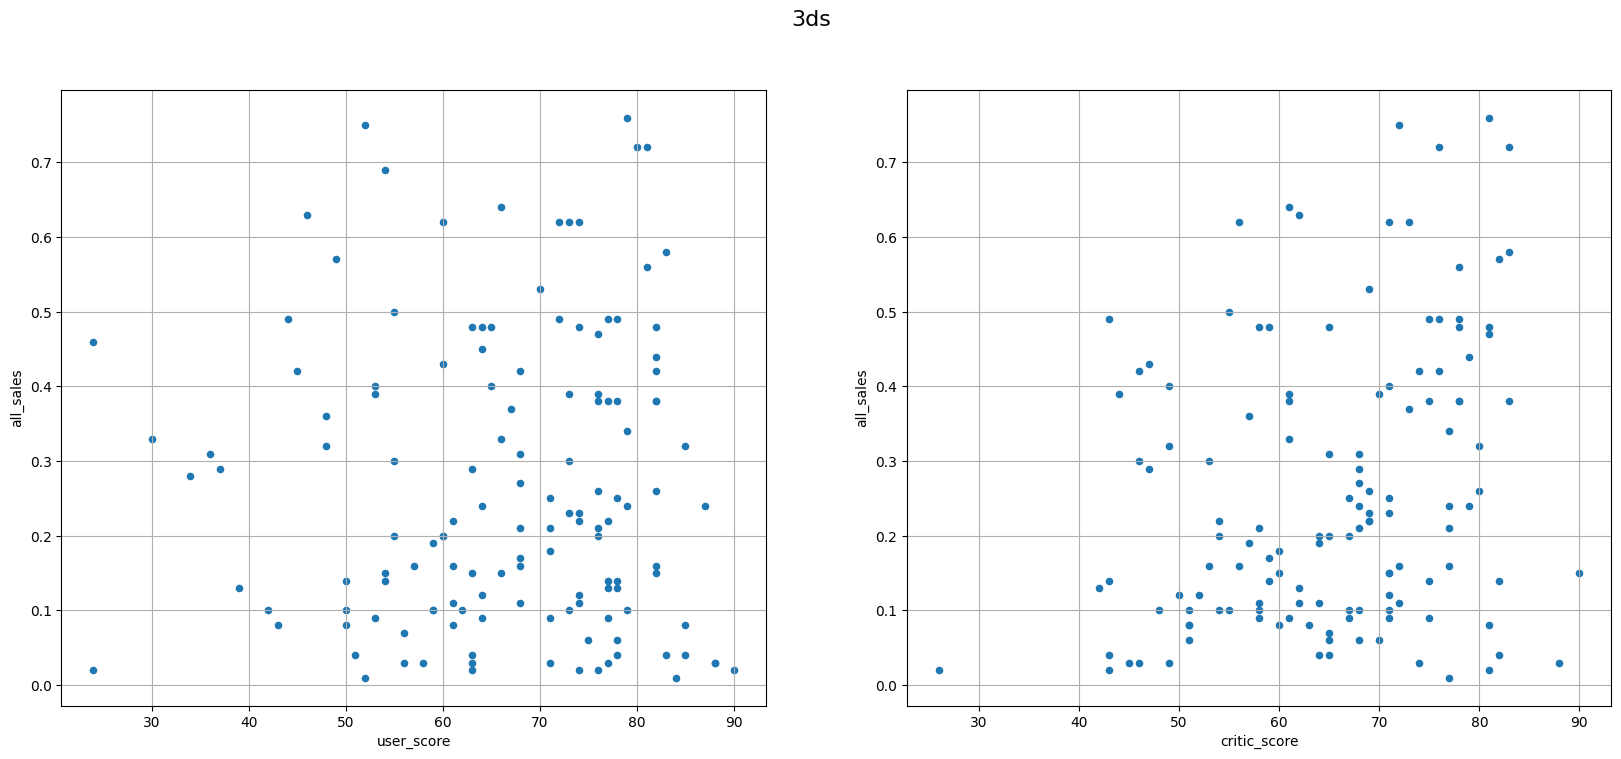

Correlation between critic reviews and sales for platform 3ds is weak: 0.26
Correlation between user reviews and sales for platform 3ds is very weak: -0.0


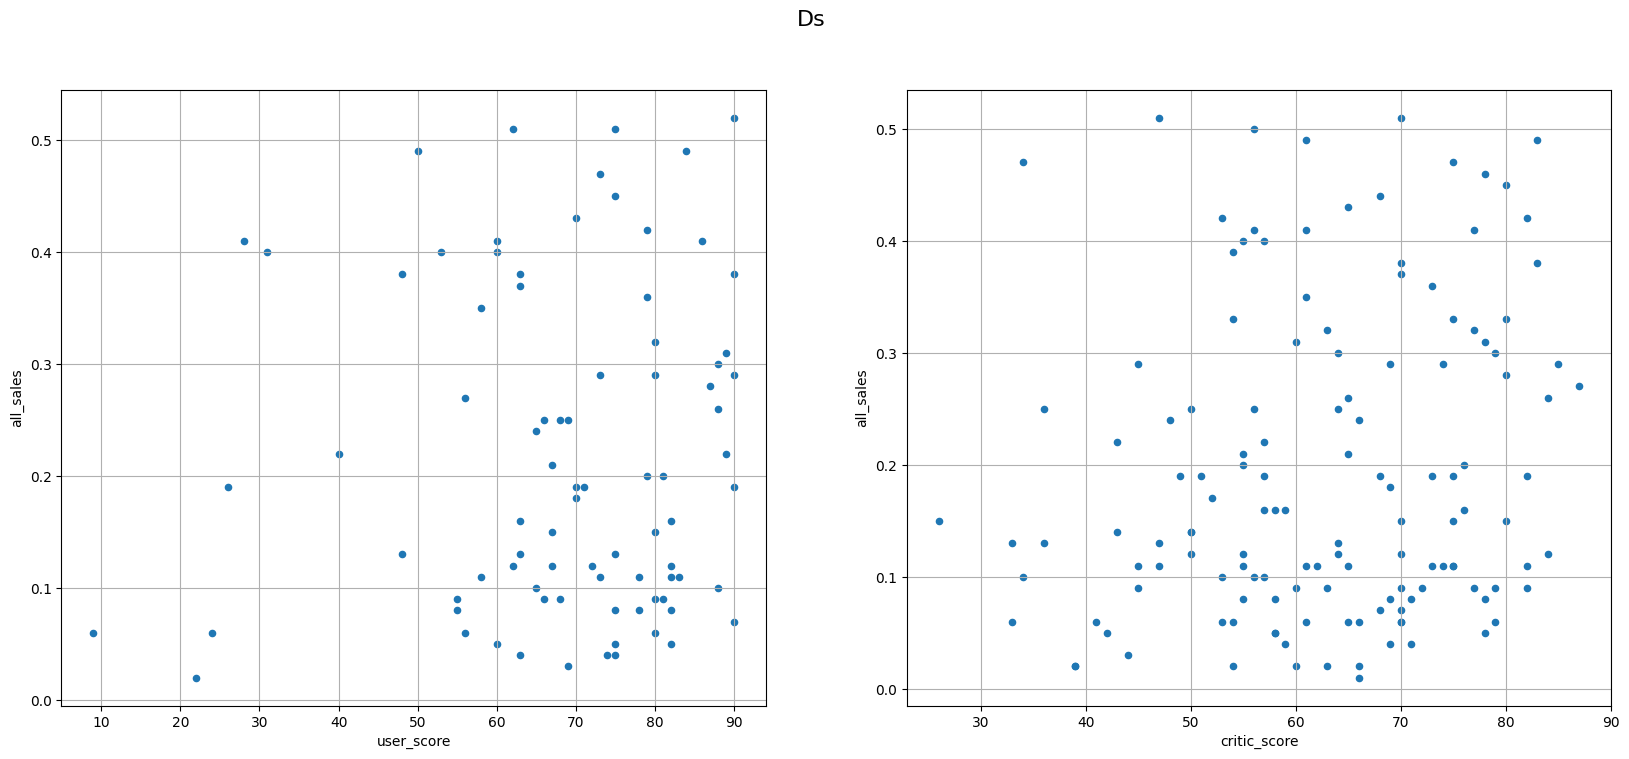

Correlation between critic reviews and sales for platform Ds is very weak: 0.17
Correlation between user reviews and sales for platform Ds is very weak: 0.06


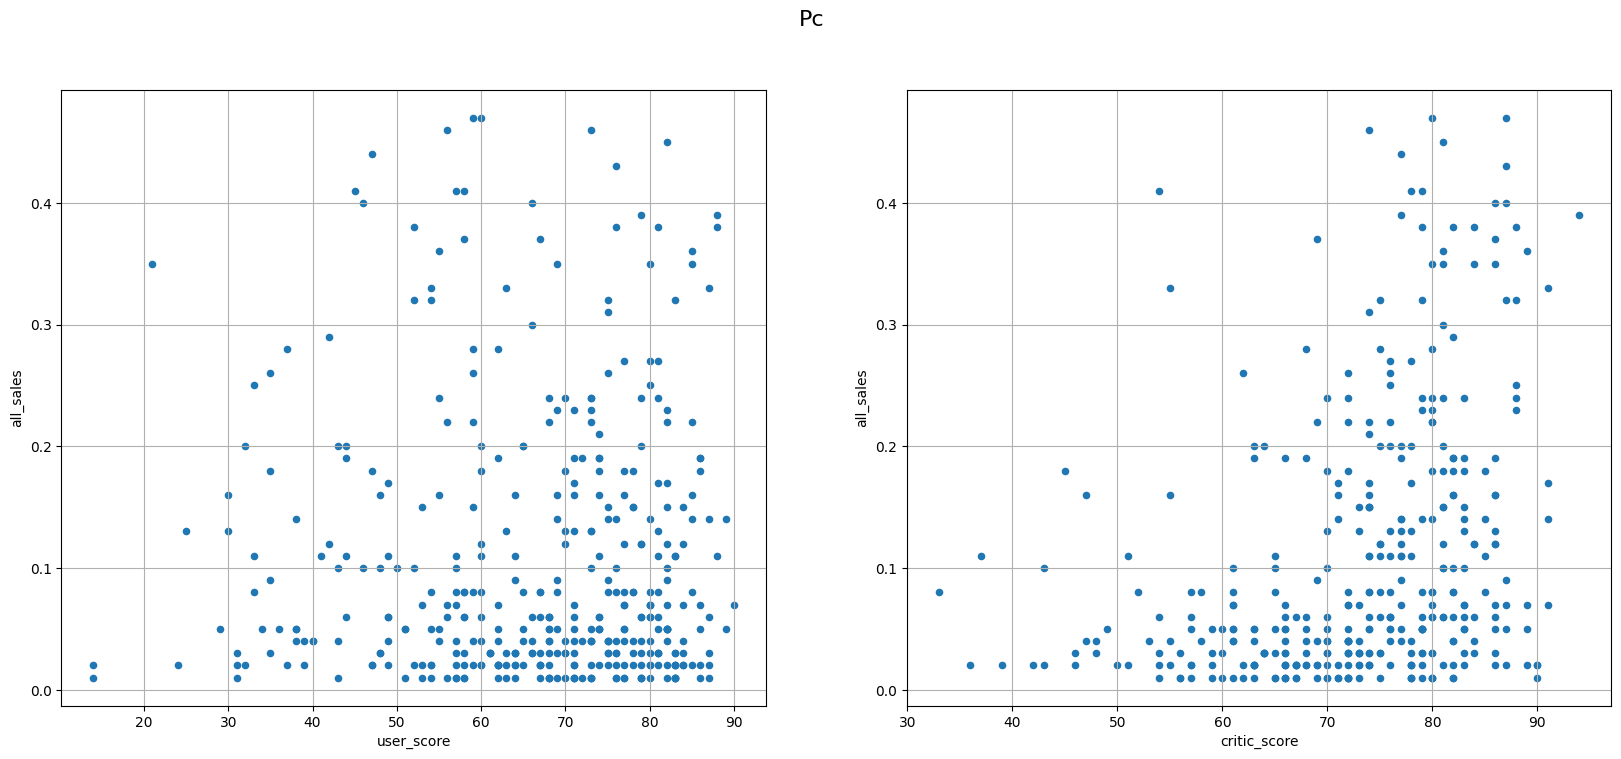

Correlation between critic reviews and sales for platform Pc is weak: 0.33
Correlation between user reviews and sales for platform Pc is very weak: -0.01


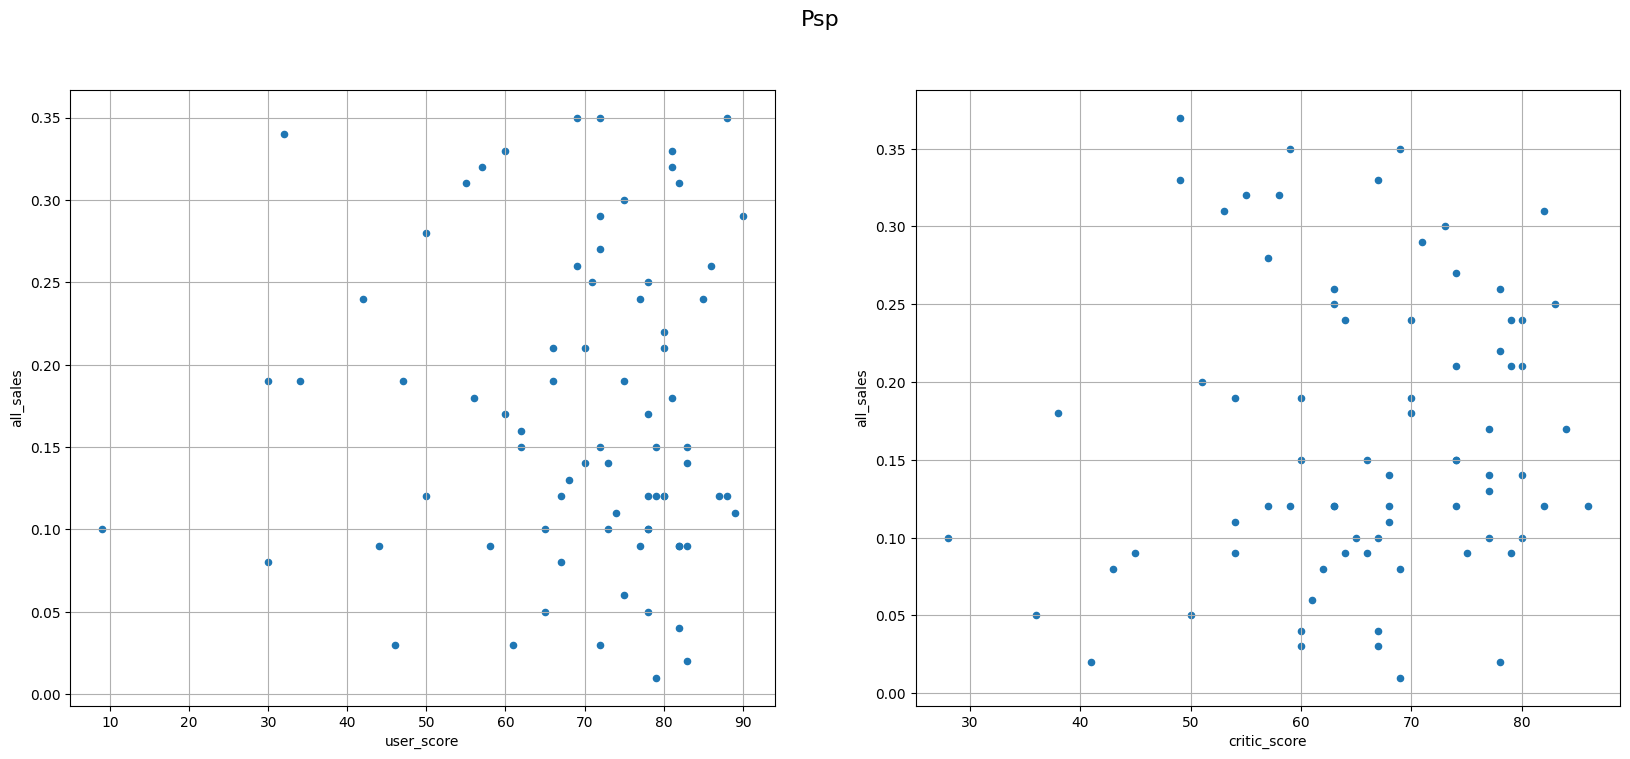

Correlation between critic reviews and sales for platform Psp is very weak: 0.09
Correlation between user reviews and sales for platform Psp is very weak: -0.01


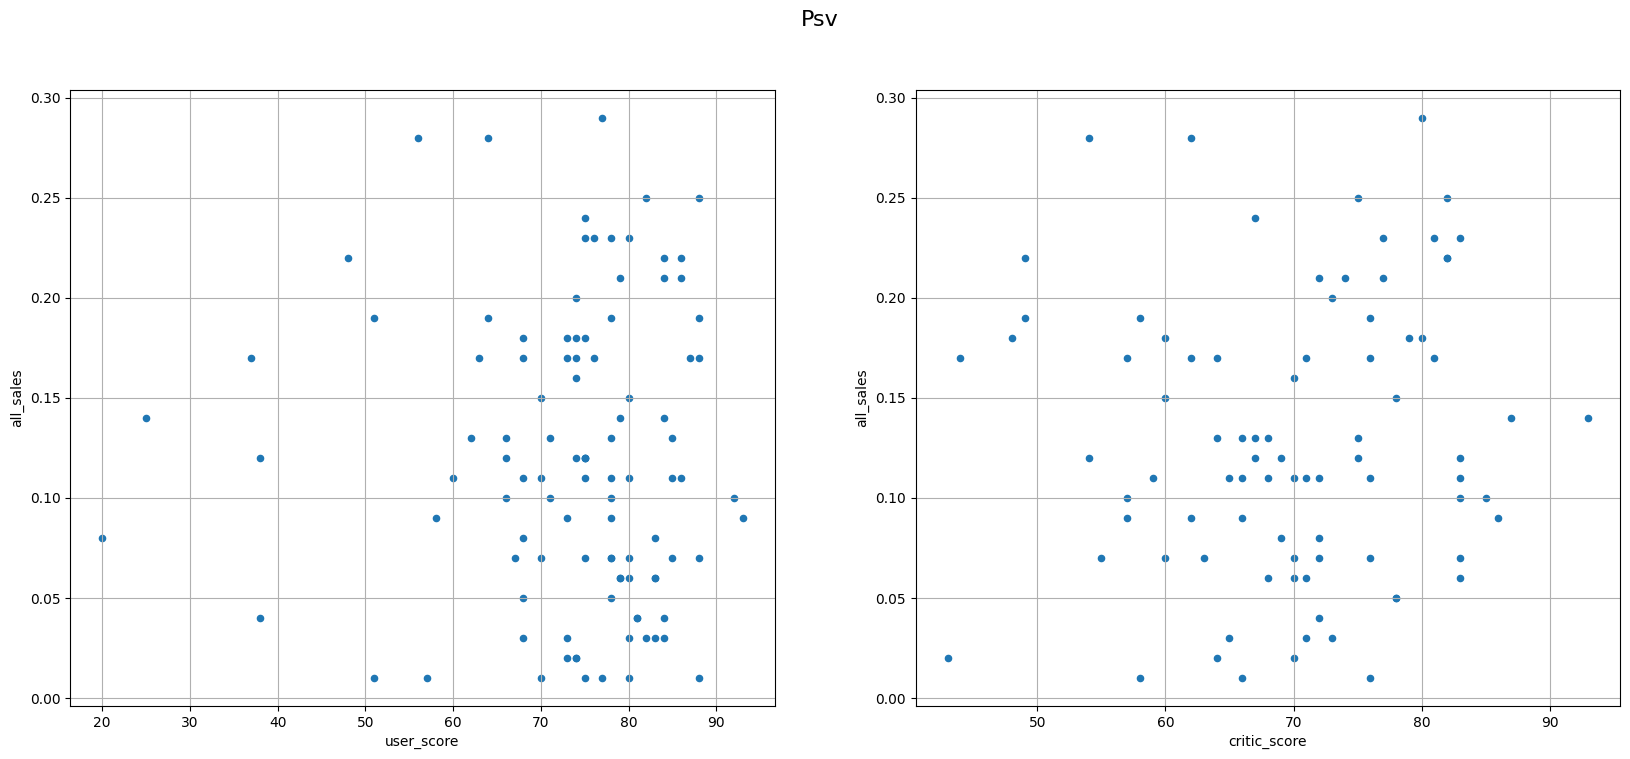

Correlation between critic reviews and sales for platform Psv is very weak: 0.07
Correlation between user reviews and sales for platform Psv is very weak: -0.02



In [48]:
for platform in data['platform'].unique():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

    platform_data = data[data['platform'] == platform]

    platform_data.plot(x='user_score', y='all_sales', kind='scatter', grid=True, ax=ax1)
    platform_data.plot(x='critic_score', y='all_sales', kind='scatter', grid=True, ax=ax2)
    fig.suptitle(platform.capitalize(), fontsize=16)
    plt.show()

    user_sales_corr = round(platform_data['all_sales'].corr(platform_data['user_score']), 2)
    critic_sales_corr = round(platform_data['all_sales'].corr(platform_data['critic_score']), 2)

    print(f"Correlation between critic reviews and sales for platform {platform.capitalize()} is {corr_category(critic_sales_corr)}: {critic_sales_corr}")
    print(f"Correlation between user reviews and sales for platform {platform.capitalize()} is {corr_category(user_sales_corr)}: {user_sales_corr}")
    print('\n')

For almost all platforms, the correlation between `user_score` and `all_sales`, as well as between `critic_score` and `all_sales`, is weak or very weak, indicating that there is no relationship between these columns. However, two platforms stand out - `PS2` and `PS3`, where the correlation between `critic_score` and `all_sales` is moderate. This may suggest that users tend to look at critic reviews before purchasing a game.

Let's look at the overall distribution of games by genre.

<Axes: xlabel='genre'>

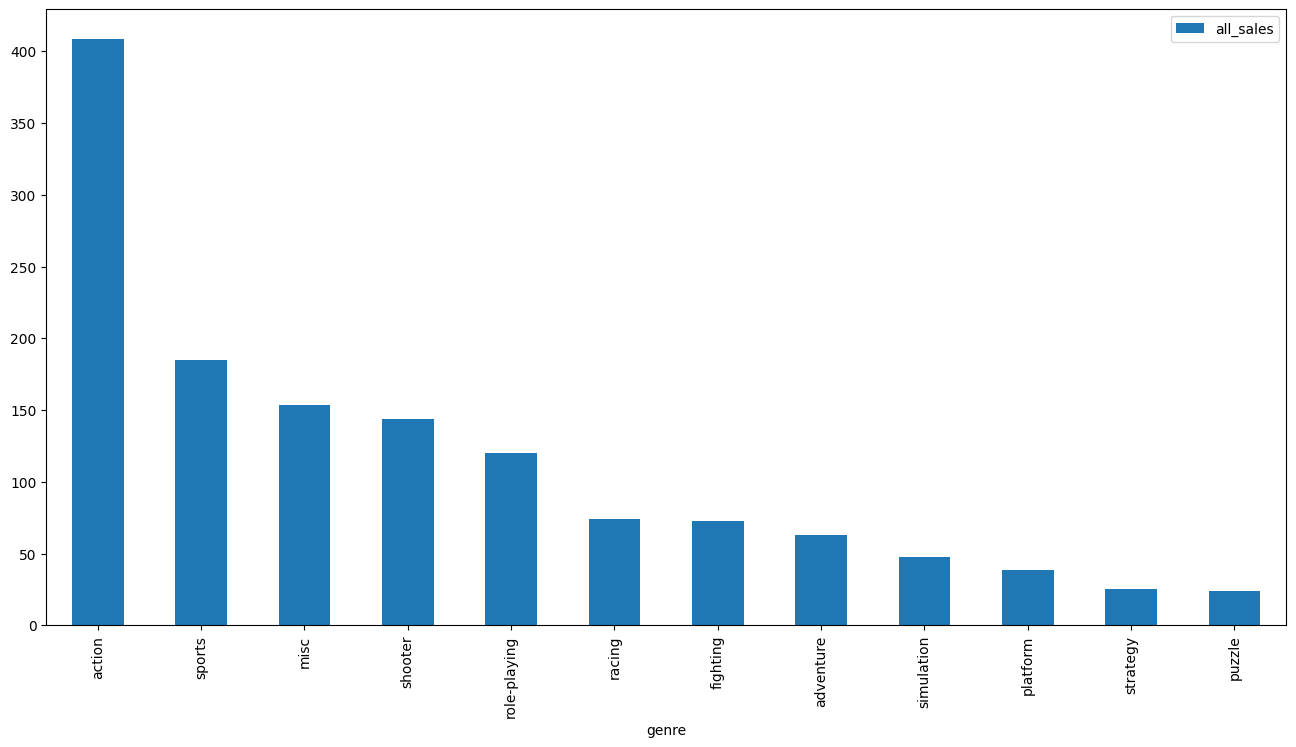

In [49]:
(
    data.groupby('genre')
        .agg({'all_sales': 'sum'})
        .sort_values(by='all_sales', ascending=False)
        .plot(kind='bar', figsize=(16, 8))
)

The most popular genres are `action` and `sports`, while `puzzle` is not popular among users. Let's also take a look at the genre distribution on the market, i.e., how many games there are in each genre.

<Axes: xlabel='genre'>

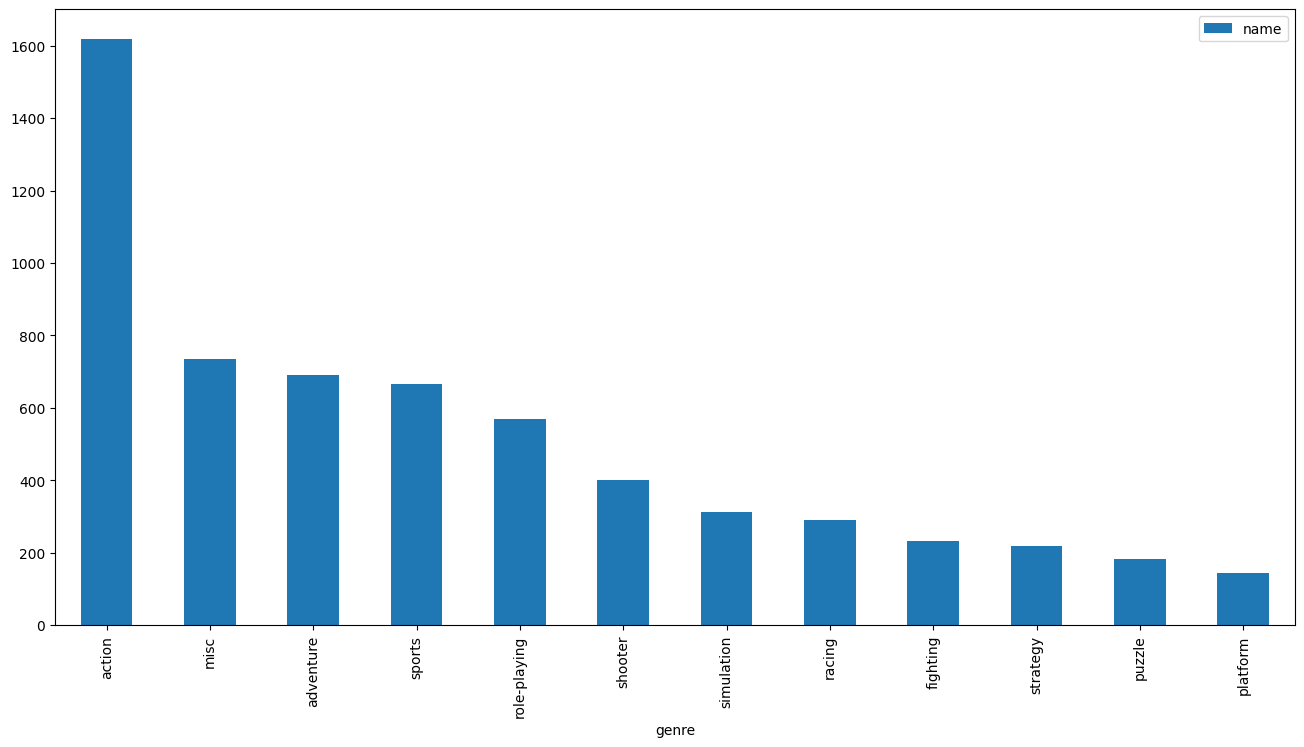

In [50]:
(
    data.groupby('genre')
        .agg({'name': 'count'})
        .sort_values(by='name', ascending=False)
        .plot(kind='bar', figsize=(16, 8))
)

As we can see, the genre with the most games available on the market is `action`, followed by `sports`, while `puzzle` is at the bottom.

**Conclusion**
- Since the early 90s, the game market has been growing, reaching its peak around 2008-2009, followed by a decline, which could be attributed to the widespread adoption of the internet and rampant game piracy.
- On average, a platform stays on the market for 7 years, with peak popularity occurring within the first 3-4 years.
- From 2009 to 2016, the largest gaming platforms were PS and Xbox.
- 50% of games across all platforms have sales below a quarter of a million.
- The correlation between ratings and game sales is generally weak. If there is any moderate correlation, it's typically between critic ratings and sales.
- The most popular genre during the 2009-2016 period was `action`.

## User Portrait for Each Region

Let's determine for users in each region (NA, EU, JP):
- the most popular platforms (top 5)
- the most popular genres (top 5)
- and find out if the ESRB rating affects sales in each region.

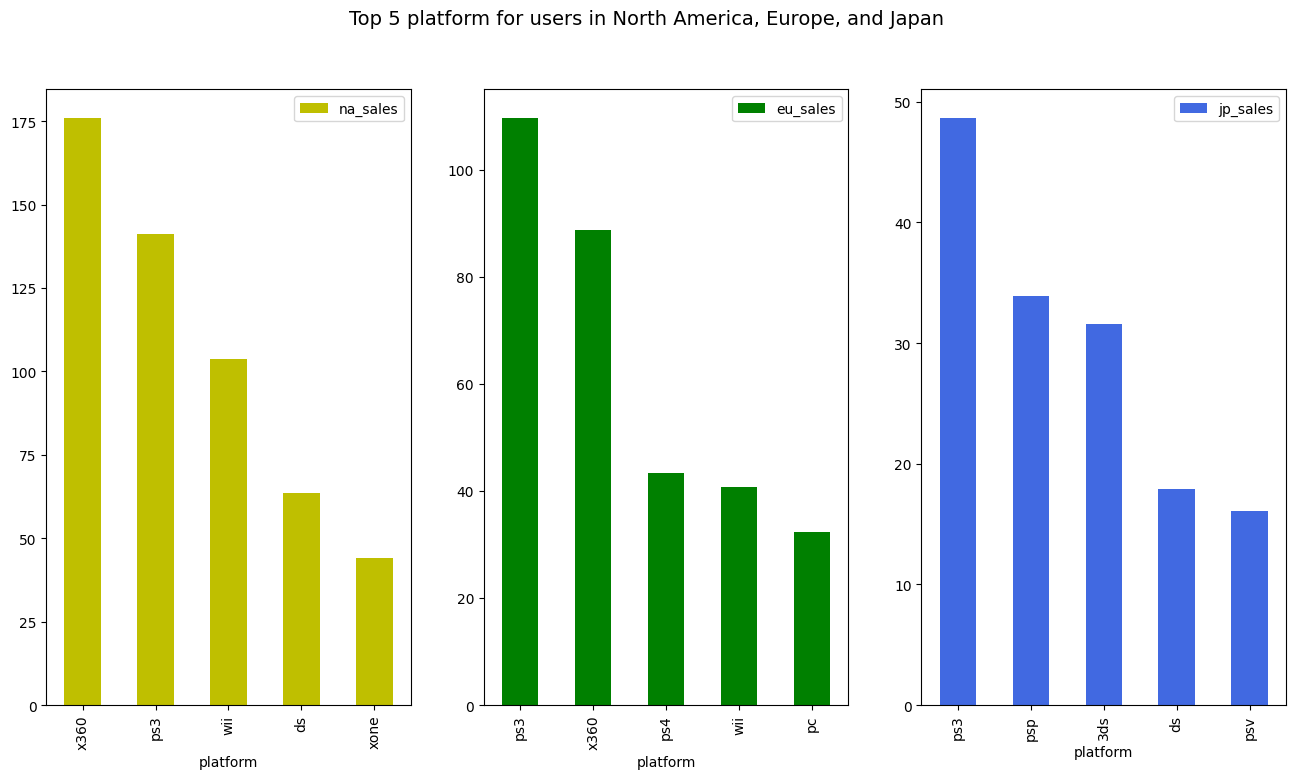

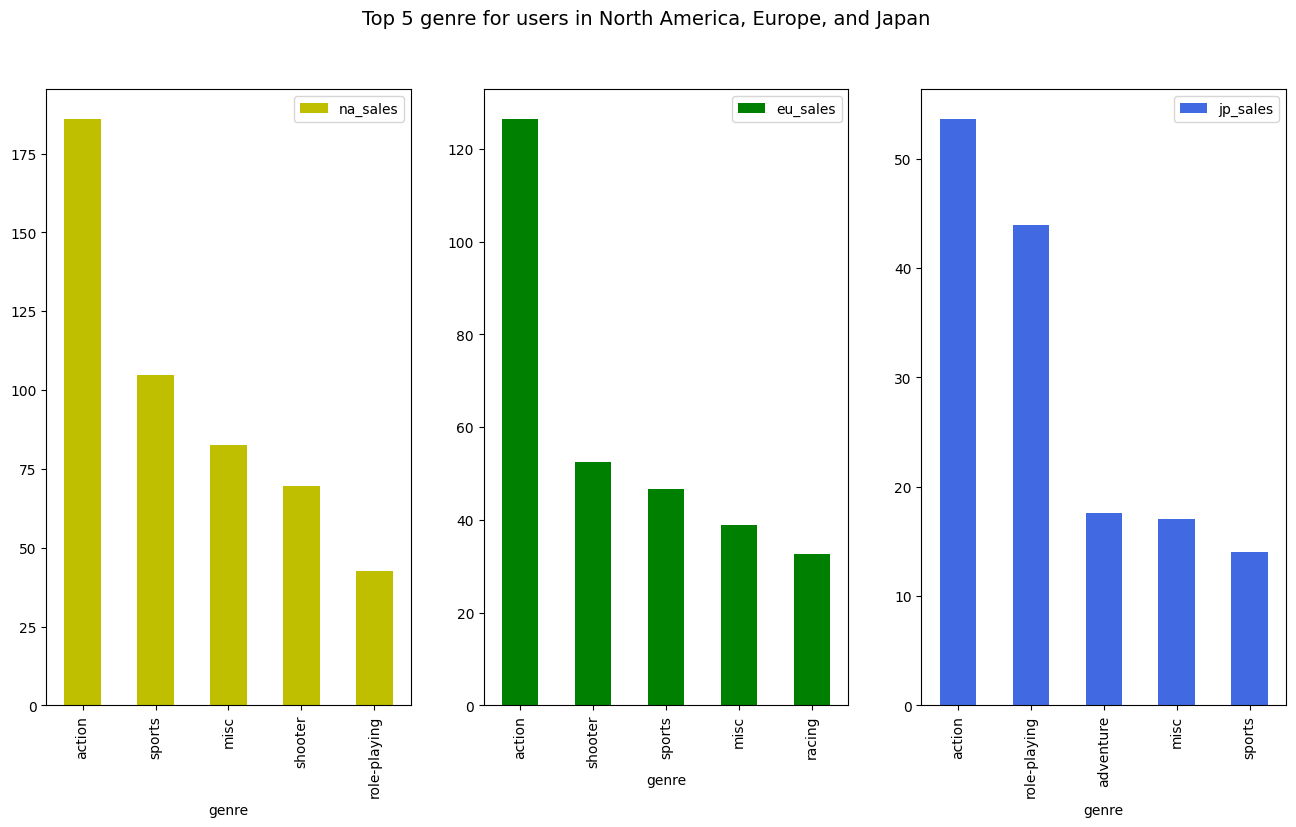

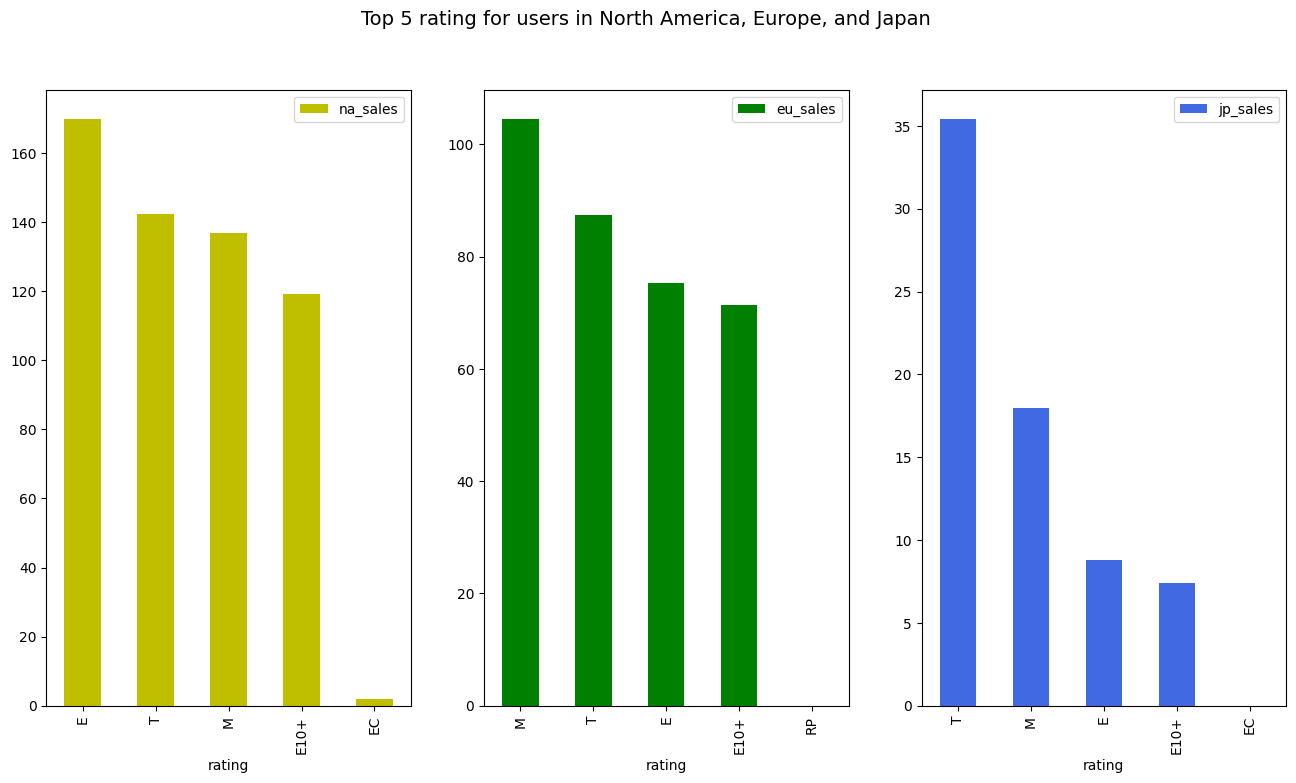

In [51]:
region_sales = ['na_sales', 'eu_sales', 'jp_sales']
columns = ['platform', 'genre', 'rating']
colors = ['y', 'g', 'royalblue']

for col in columns:
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for region_sale, ax, color in zip(region_sales, axes, colors):
        (
            data.groupby(col)
                .agg({region_sale: 'sum'})
                .sort_values(by=region_sale, ascending=False)[:5]
                .plot(kind='bar', figsize=(16, 8), ax=ax, color=color)
        )
    fig.suptitle(f'Top 5 {col} for users in North America, Europe, and Japan', fontsize=14)
    plt.show()

ESRB Rating Symbols:
- T (Teen) — suitable for ages 13 and older
- M (Mature) — suitable for ages 17 and older
- E (Everyone) — suitable for all ages
- E10+ (Everyone 10 and older) — suitable for ages 10 and older
- EC (Early childhood) — suitable for children ages 3 and older
- RP (Rating Pending) — rating pending

User Portrait of North America:
- The most popular gaming platforms during 2009-2016 were *X360*, *Ps3*, *Wii*, *Ds*, *Xone*.
- The top 5 genres include *action*, *sports*, *misc*, *shooter*, *role-playing*.
- The highest sales are from games rated *E (Everyone)*, followed by *T (Teen)*, *M (Mature)*, and *E10+ (Everyone 10 and older)*.

User Portrait of Europe:
- The most popular gaming platforms during 2009-2016 were *Ps3*, *x360*, *Ps4*, *Wii*, *Pc*.
- The top 5 genres include *action*, *shooter*, *sports*, *misc*, *racing*.
- The highest sales are from games rated *M (Mature)*, followed by *T (Teen)*, *E (Everyone)*, and *E10+ (Everyone 10 and older)*.

User Portrait of Japan:
- The most popular gaming platforms during 2009-2016 were *Ps3*, *Psp*, *3ds*, *Ds*, *Psv*.
- The top 5 genres include *action*, *role-playing*, *adventure*, *misc*, *sports*.
- The most popular ratings are *T (Teen)*, *M (Mature)*, *E (Everyone)*, and *E10+ (Everyone 10 and older)*.

**Conclusion**

From the graph, we can see that sales vary in different regions. North America leads in sales volume, followed by Europe, while Japan has the fewest sales. While the difference between Japan and other regions can be explained by the country's population, the gap between Europe and North America is unclear (with populations of 750 million and 570 million, respectively).

We also observe that North America and Europe share more common popular platforms and game genres than either does with Japan. The similarity in genres can be explained by similar cultural heritage. It is also strange that the PS4 is in the top 5 in Europe but not in America, although this platform was announced first in North America in November 2013.

In the top 3 ESRB ratings, games for everyone (E), for teenagers (T), and for adults (M) are included for all regions.

## Hypothesis Testing

### Average user ratings for the Xbox One and PC platforms are equal

To test this hypothesis, we need to formulate the null and alternative hypotheses:

- **H0** (null hypothesis) - The average user ratings for the Xbox One and PC platforms are **equal**;
- **H1** (alternative hypothesis) - The average user ratings for the Xbox One and PC platforms are **different**.

Since we are not concerned with the direction of the difference between the two samples for hypothesis testing, we will use a two-tailed t-test for two independent samples. We will choose a significance level of 5%.

In [52]:
from scipy import stats as st

xone_data = data[data['platform'] == 'xone']
pc_data = data[data['platform'] == 'pc']

alpha = 0.05

results = st.ttest_ind(xone_data['user_score'].dropna(), pc_data['user_score'].dropna())

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

p-value: 0.5870087656648763
Fail to reject the null hypothesis


We failed to reject the hypothesis that the average user ratings of the Xbox One and PC platforms are the same.

### The average user ratings of the Action and Sports genres are different

Let's formulate the null and alternative hypotheses:

- **H0** (null hypothesis) - The average user ratings of the *action* and *sports* genres are the **same**;
- **H1** (alternative hypothesis) - The average user ratings of the *action* and *sports* genres are **different**.

To test this hypothesis, we'll use a two-sided t-test, keeping the threshold value unchanged.

In [53]:
action_data = data[data['genre'] == 'action']
sports_data = data[data['genre'] == 'sports']

results = st.ttest_ind(action_data['user_score'], sports_data['user_score'], nan_policy="omit")

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

p-value: 6.540465686368012e-13
Reject the null hypothesis


We reject the null hypothesis because the p-value is less than the threshold, indicating that the average user ratings of the *action* and *sports* genres are different. However, let's calculate the mean for both samples to assess the direction of the effect.

In [54]:
print('Average user rating for the action genre: ', action_data['user_score'].mean())
print('Average user rating for the sports genre: ', sports_data['user_score'].mean())

Average user rating for the action genre:  67.3956043956044
Average user rating for the sports genre:  60.315625


The rating for the *action* genre is higher.

## The general conclusion 

Based on the analysis conducted, here are the conclusions taking into account the main task of forecasting sales for 2017:

- The average lifespan of a gaming platform is around 7 years. Therefore, it is reasonable to use data from 2009 to 2016 for forecasting.
- The platforms remaining relevant and potentially profitable for 2017 are PS4, PC, WiiU, and Xbox One.
- The analysis revealed a weak correlation between sales volume and user/critic ratings. Therefore, it is not necessary to consider them when planning advertising campaigns.
- Besides the platform, important factors include genre and rating. According to the analysis, games with ratings M, T, E, and E10+ sell well, so focusing on them is advisable.
- Genre preferences vary slightly by region. While action games lead in all regions, North American and European gamers also prefer sports, misc, shooter, role-playing, and racing games, while Japanese gamers prefer role-playing, adventure, misc, and sports games.